In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 4
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r4_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r4.csv", delimiter=" ")


print(menor.shape)

(11031, 4)


In [2]:
def get_array(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)/5),5)
    return erro_array

def get_array2(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),10)
    return erro_array

def get_errors(e0,e1,e2,e3,e4,e5,e6,e7,e8,e9):
    
    mae=[np.sum(np.abs(e0),axis=0)[2]/e0.shape[0],np.sum(np.abs(e1),axis=0)[2]/e1.shape[0],np.sum(np.abs(e2),axis=0)[2]/e2.shape[0],
       np.sum(np.abs(e3),axis=0)[2]/e3.shape[0],np.sum(np.abs(e4),axis=0)[2]/e4.shape[0],np.sum(np.abs(e5),axis=0)[2]/e5.shape[0],
       np.sum(np.abs(e6),axis=0)[2]/e6.shape[0],np.sum(np.abs(e7,),axis=0)[2]/e7.shape[0],np.sum(np.abs(e8),axis=0)[2]/e8.shape[0],
       np.sum(np.abs(e9),axis=0)[2]/e9.shape[0]]
    
    mse=[np.sum(e0**2,axis=0)[2]/e0.shape[0],np.sum(e1**2,axis=0)[2]/e1.shape[0],np.sum(e2**2,axis=0)[2]/e2.shape[0],
       np.sum(e3**2,axis=0)[2]/e3.shape[0],np.sum(e4**2,axis=0)[2]/e4.shape[0],np.sum(e5**2,axis=0)[2]/e5.shape[0],
       np.sum(e6**2,axis=0)[2]/e6.shape[0],np.sum(e7**2,axis=0)[2]/e7.shape[0],np.sum(e8**2,axis=0)[2]/e8.shape[0],
       np.sum(e9**2,axis=0)[2]/e9.shape[0]]

    rmse=[np.sqrt(np.sum(e0**2,axis=0)[2]/e0.shape[0]),np.sqrt(np.sum(e1**2,axis=0)[2]/e1.shape[0]),np.sqrt(np.sum(e2**2,axis=0)[2]/e2.shape[0]),
       np.sqrt(np.sum(e3**2,axis=0)[2]/e3.shape[0]),np.sqrt(np.sum(e4**2,axis=0)[2]/e4.shape[0]),np.sqrt(np.sum(e5**2,axis=0)[2]/e5.shape[0]),
       np.sqrt(np.sum(e6**2,axis=0)[2]/e6.shape[0]),np.sqrt(np.sum(e7**2,axis=0)[2]/e7.shape[0]),np.sqrt(np.sum(e8**2,axis=0)[2]/e8.shape[0]),
       np.sqrt(np.sum(e9**2,axis=0)[2]/e9.shape[0])]
    
    return mae,mse,rmse
    

In [3]:
erro_bl0 = []
erro_bl1 = []
erro_bl2 = []
erro_bl3 = []
erro_bl4 = []
erro_bl5 = []
erro_bl6 = []
erro_bl7 = []
erro_bl8 = []
erro_bl9 = []

erro2d_bl0 = []
erro2d_bl1 = []
erro2d_bl2 = []
erro2d_bl3 = []
erro2d_bl4 = []
erro2d_bl5 = []
erro2d_bl6 = []
erro2d_bl7 = []
erro2d_bl8 = []
erro2d_bl9 = []

erro3d_bl0 = []
erro3d_bl1 = []
erro3d_bl2 = []
erro3d_bl3 = []
erro3d_bl4 = []
erro3d_bl5 = []
erro3d_bl6 = []
erro3d_bl7 = []
erro3d_bl8 = []
erro3d_bl9 = []

erro4d_bl0 = []
erro4d_bl1 = []
erro4d_bl2 = []
erro4d_bl3 = []
erro4d_bl4 = []
erro4d_bl5 = []
erro4d_bl6 = []
erro4d_bl7 = []
erro4d_bl8 = []
erro4d_bl9 = []

MAE = []
MSE = []
RMSE = []
MAE2D = []
MSE2D = []
RMSE2D = []
MAE3D = []
MSE3D = []
RMSE3D = []
MAE4D = []
MSE4D = []
RMSE4D = []


for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 10
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print('test error:',error)
   
    
    
    cont = np.zeros((10))
    for ii in range(future):
        
        if data[trainlen+ii] < 0.1:
            erro_bl0.append(prediction[ii][0])
            erro_bl0.append(data[trainlen+ii])
            erro_bl0.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl0.append(i)
            erro_bl0.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl0.append(prediction[ii][0])
                erro2d_bl0.append(data[trainlen+ii])
                erro2d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl0.append(i)
                erro2d_bl0.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl0.append(prediction[ii][0])
                erro3d_bl0.append(data[trainlen+ii])
                erro3d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl0.append(i)
                erro3d_bl0.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl0.append(prediction[ii][0])
                erro4d_bl0.append(data[trainlen+ii])
                erro4d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl0.append(i)
                erro4d_bl0.append(ii)
            cont[0]+=1
        elif data[trainlen+ii] < 0.2:
            erro_bl1.append(prediction[ii][0])
            erro_bl1.append(data[trainlen+ii])
            erro_bl1.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl1.append(i)
            erro_bl1.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl1.append(prediction[ii][0])
                erro2d_bl1.append(data[trainlen+ii])
                erro2d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl1.append(i)
                erro2d_bl1.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl1.append(prediction[ii][0])
                erro3d_bl1.append(data[trainlen+ii])
                erro3d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl1.append(i)
                erro3d_bl1.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl1.append(prediction[ii][0])
                erro4d_bl1.append(data[trainlen+ii])
                erro4d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl1.append(i)
                erro4d_bl1.append(ii)
            cont[1]+=1
        elif data[trainlen+ii] < 0.3:
            erro_bl2.append(prediction[ii][0])
            erro_bl2.append(data[trainlen+ii])
            erro_bl2.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl2.append(i)
            erro_bl2.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl2.append(prediction[ii][0])
                erro2d_bl2.append(data[trainlen+ii])
                erro2d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl2.append(i)
                erro2d_bl2.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl2.append(prediction[ii][0])
                erro3d_bl2.append(data[trainlen+ii])
                erro3d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl2.append(i)
                erro3d_bl2.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl2.append(prediction[ii][0])
                erro4d_bl2.append(data[trainlen+ii])
                erro4d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl2.append(i)
                erro4d_bl2.append(ii)
            cont[2]+=1
        elif data[trainlen+ii] < 0.4:
            erro_bl3.append(prediction[ii][0])
            erro_bl3.append(data[trainlen+ii])
            erro_bl3.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl3.append(i)
            erro_bl3.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl3.append(prediction[ii][0])
                erro2d_bl3.append(data[trainlen+ii])
                erro2d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl3.append(i)
                erro2d_bl3.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl3.append(prediction[ii][0])
                erro3d_bl3.append(data[trainlen+ii])
                erro3d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl3.append(i)
                erro3d_bl3.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl3.append(prediction[ii][0])
                erro4d_bl3.append(data[trainlen+ii])
                erro4d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl3.append(i)
                erro4d_bl3.append(ii)
            cont[3]+=1
        elif data[trainlen+ii] < 0.5:
            erro_bl4.append(prediction[ii][0])
            erro_bl4.append(data[trainlen+ii])
            erro_bl4.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl4.append(i)
            erro_bl4.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl4.append(prediction[ii][0])
                erro2d_bl4.append(data[trainlen+ii])
                erro2d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl4.append(i)
                erro2d_bl4.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl4.append(prediction[ii][0])
                erro3d_bl4.append(data[trainlen+ii])
                erro3d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl4.append(i)
                erro3d_bl4.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl4.append(prediction[ii][0])
                erro4d_bl4.append(data[trainlen+ii])
                erro4d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl4.append(i)
                erro4d_bl4.append(ii)
            cont[4]+=1
        elif data[trainlen+ii] < 0.6:
            erro_bl5.append(prediction[ii][0])
            erro_bl5.append(data[trainlen+ii])
            erro_bl5.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl5.append(i)
            erro_bl5.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl5.append(prediction[ii][0])
                erro2d_bl5.append(data[trainlen+ii])
                erro2d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl5.append(i)
                erro2d_bl5.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl5.append(prediction[ii][0])
                erro3d_bl5.append(data[trainlen+ii])
                erro3d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl5.append(i)
                erro3d_bl5.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl5.append(prediction[ii][0])
                erro4d_bl5.append(data[trainlen+ii])
                erro4d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl5.append(i)
                erro4d_bl5.append(ii)
            cont[5]+=1
        elif data[trainlen+ii] < 0.7:
            erro_bl6.append(prediction[ii][0])
            erro_bl6.append(data[trainlen+ii])
            erro_bl6.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl6.append(i)
            erro_bl6.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl6.append(prediction[ii][0])
                erro2d_bl6.append(data[trainlen+ii])
                erro2d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl6.append(i)
                erro2d_bl6.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl6.append(prediction[ii][0])
                erro3d_bl6.append(data[trainlen+ii])
                erro3d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl6.append(i)
                erro3d_bl6.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl6.append(prediction[ii][0])
                erro4d_bl6.append(data[trainlen+ii])
                erro4d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl6.append(i)
                erro4d_bl6.append(ii)
            cont[6]+=1
        elif data[trainlen+ii] < 0.8:
            erro_bl7.append(prediction[ii][0])
            erro_bl7.append(data[trainlen+ii])
            erro_bl7.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl7.append(i)
            erro_bl7.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl7.append(prediction[ii][0])
                erro2d_bl7.append(data[trainlen+ii])
                erro2d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl7.append(i)
                erro2d_bl7.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl7.append(prediction[ii][0])
                erro3d_bl7.append(data[trainlen+ii])
                erro3d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl7.append(i)
                erro3d_bl7.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl7.append(prediction[ii][0])
                erro4d_bl7.append(data[trainlen+ii])
                erro4d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl7.append(i)
                erro4d_bl7.append(ii)
            cont[7]+=1
        elif data[trainlen+ii] < 0.9:
            erro_bl8.append(prediction[ii][0])
            erro_bl8.append(data[trainlen+ii])
            erro_bl8.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl8.append(i)
            erro_bl8.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl8.append(prediction[ii][0])
                erro2d_bl8.append(data[trainlen+ii])
                erro2d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl8.append(i)
                erro2d_bl8.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl8.append(prediction[ii][0])
                erro3d_bl8.append(data[trainlen+ii])
                erro3d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl8.append(i)
                erro3d_bl8.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl8.append(prediction[ii][0])
                erro4d_bl8.append(data[trainlen+ii])
                erro4d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl8.append(i)
                erro4d_bl8.append(ii)
            cont[8]+=1
        else:
            erro_bl9.append(prediction[ii][0])
            erro_bl9.append(data[trainlen+ii])
            erro_bl9.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl9.append(i)
            erro_bl9.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl9.append(prediction[ii][0])
                erro2d_bl9.append(data[trainlen+ii])
                erro2d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl9.append(i)
                erro2d_bl9.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl9.append(prediction[ii][0])
                erro3d_bl9.append(data[trainlen+ii])
                erro3d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl9.append(i)
                erro3d_bl9.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl9.append(prediction[ii][0])
                erro4d_bl9.append(data[trainlen+ii])
                erro4d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl9.append(i)
                erro4d_bl9.append(ii)
            cont[9]+=1
    
    mae,mse,rmse = get_errors(get_array(erro_bl0),get_array(erro_bl1),get_array(erro_bl2),get_array(erro_bl3),get_array(erro_bl4),get_array(erro_bl5),get_array(erro_bl6),get_array(erro_bl7),get_array(erro_bl8),get_array(erro_bl9))
    mae2d,mse2d,rmse2d = get_errors(get_array(erro2d_bl0),get_array(erro2d_bl1),get_array(erro2d_bl2),get_array(erro2d_bl3),get_array(erro2d_bl4),get_array(erro2d_bl5),get_array(erro2d_bl6),get_array(erro2d_bl7),get_array(erro2d_bl8),get_array(erro2d_bl9)) 
    mae3d,mse3d,rmse3d = get_errors(get_array(erro3d_bl0),get_array(erro3d_bl1),get_array(erro3d_bl2),get_array(erro3d_bl3),get_array(erro3d_bl4),get_array(erro3d_bl5),get_array(erro3d_bl6),get_array(erro3d_bl7),get_array(erro3d_bl8),get_array(erro3d_bl9))  
    mae4d,mse4d,rmse4d = get_errors(get_array(erro4d_bl0),get_array(erro4d_bl1),get_array(erro4d_bl2),get_array(erro4d_bl3),get_array(erro4d_bl4),get_array(erro4d_bl5),get_array(erro4d_bl6),get_array(erro4d_bl7),get_array(erro4d_bl8),get_array(erro4d_bl9)) 
    
    MAE.append(mae)
    MSE.append(mse)
    RMSE.append(rmse)
    MAE2D.append(mae2d)
    MSE2D.append(mse2d)
    RMSE2D.append(rmse2d)
    MAE3D.append(mae3d)
    MSE3D.append(mse3d)
    RMSE3D.append(rmse3d)
    MAE4D.append(mae4d)
    MSE4D.append(mse4d)
    RMSE4D.append(rmse4d)
        
    
    mae_cp,mse_cp,rmse_cp = mae,mse,rmse
    mae2d_cp,mse2d_cp,rmse2d_cp = mae2d,mse2d,rmse2d
    mae3d_cp,mse3d_cp,rmse3d_cp = mae3d,mse3d,rmse3d
    mae4d_cp,mse4d_cp,rmse4d_cp = mae4d,mse4d,rmse4d
    
    
    
    

test error: 0.0005886494719325228


/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarni

test error: 0.007803608016605303
test error: 0.0009746266380366917
test error: 0.00908744063726895
test error: 0.001689452596833046
test error: 0.002352393763440707
test error: 0.0012323668994560254
test error: 0.0023316127522795584
test error: 0.0012344179444064537
test error: 0.0010567337147994271
test error: 0.01686787354265514
test error: 0.0012956028083508022
test error: 0.002418737001072495
test error: 0.001740997634595691
test error: 0.006526864340008716
test error: 0.009015791187896438
test error: 0.0066306223399855745
test error: 0.0007409088667944231
test error: 0.0007738097787250112
test error: 0.005407643641788397
test error: 0.011486331404187918
test error: 0.07154847856845727
test error: 0.0009036688261547281
test error: 0.008418600213480546
test error: 0.004821755065189687
test error: 0.0023666431999067477
test error: 0.0018595183324201627
test error: 0.0016938836166411476
test error: 0.002492673961669237
test error: 0.0014724395798368219
test error: 0.003662394041473178

test error: 0.0013275798856753004
test error: 0.00212581172570845
test error: 0.004292352931435632
test error: 0.0018789732743979364
test error: 0.002750104421489436
test error: 0.0018686923664246139
test error: 0.003946073560222627
test error: 0.00312687933528225
test error: 0.0016858627388195175
test error: 0.001100718896920851
test error: 0.009558450796009975
test error: 0.0017325349150025002
test error: 0.0020656693876107573
test error: 0.002154525687935399
test error: 0.0017542344978051367
test error: 0.0014468118224790294
test error: 0.0019427440871402986
test error: 0.0012739912724401166
test error: 0.001977375898821513
test error: 0.00137921916652553
test error: 0.006331089809088852
test error: 0.0025514737279954767
test error: 0.004136416348266449
test error: 0.002356393119012236
test error: 0.0012594456216616962
test error: 0.002370743331350345
test error: 0.002949587177695349
test error: 0.001077867830992709
test error: 0.0020495099823641975
test error: 0.0008924184558845114

test error: 0.0020628795610268683
test error: 0.03191315252519501
test error: 0.0012661868456613793
test error: 0.001969105302493147
test error: 0.000995172954490224
test error: 0.003134557362198917
test error: 0.0019948525209617044
test error: 0.02710324425550922
test error: 0.0010770901456753292
test error: 0.0031844555408339706
test error: 0.000709047097739463
test error: 0.0044773771993867045
test error: 0.011342504543330972
test error: 0.0012671101111965152
test error: 0.0034514897892599554
test error: 0.004838235041898193
test error: 0.0008444030594784324
test error: 0.001157481725552638
test error: 0.008865983635891287
test error: 0.004048839368380635
test error: 0.018110845757639122
test error: 0.0013878836100716305
test error: 0.0011389960365647597
test error: 0.0021433268839977774
test error: 0.0012237020237378553
test error: 0.001778881289144133
test error: 0.0015163256700301865
test error: 0.004225107815132412
test error: 0.005866529789463213
test error: 0.00177212931243380

test error: 0.0017280532308736835
test error: 0.019413896684116482
test error: 0.0019564030596476182
test error: 0.0018925347015647566
test error: 0.026667805009116675
test error: 0.001966012415977983
test error: 0.0035665332477042024
test error: 0.0011858600542366633
test error: 0.003058037280957693
test error: 0.003277954714476151
test error: 0.015990492786070343
test error: 0.0015972968357550238
test error: 0.02013056554651788
test error: 0.0033866091958519814
test error: 0.003267369143152235
test error: 0.00752703763318631
test error: 0.002130546260890895
test error: 0.0011862023866059312
test error: 0.002265701742587859
test error: 0.00759763781757598
test error: 0.003103951168189681
test error: 0.002150857863068358
test error: 0.0009238503720321307
test error: 0.0009804590229083188
test error: 0.008095549919888177
test error: 0.023170051658420888
test error: 0.0024075518904295465
test error: 0.00216803727821604
test error: 0.0008440263897157431
test error: 0.0019441024143078914
t

test error: 0.005318529656554793
test error: 0.002032606091455504
test error: 0.003110786188098483
test error: 0.02348206465676089
test error: 0.0025184771351636657
test error: 0.005715788757906509
test error: 0.0022755808450269734
test error: 0.0025816306086006943
test error: 0.001075199187261891
test error: 0.01056261280629328
test error: 0.0022791406778490315
test error: 0.0011600517712763332
test error: 0.0007685587902584078
test error: 0.008155330888528156
test error: 0.003428107793209552
test error: 0.0005108270088028132
test error: 0.004053538949517918
test error: 0.022314916233398773
test error: 0.0008367694145779282
test error: 0.0028057265910094863
test error: 0.0031925242281368622
test error: 0.009904890966243063
test error: 0.0020077391320277053
test error: 0.004120449155881143
test error: 0.0022327469536507537
test error: 0.005763051434480651
test error: 0.0034958877030340065
test error: 0.005460096918210854
test error: 0.0033624556229230025
test error: 0.00164874768639013

test error: 0.0009336577061741805
test error: 0.0009714551116807272
test error: 0.01009388651576774
test error: 0.001706875949327142
test error: 0.0006357377591073706
test error: 0.002240178220940541
test error: 0.002077217042289663
test error: 0.002323483554250715
test error: 0.0012174435660998457
test error: 0.0024905075018703373
test error: 0.004201643616651529
test error: 0.0025229188169224952
test error: 0.0016513634757950766
test error: 0.0018695402650084896
test error: 0.0035023677097034364
test error: 0.006281228938755529
test error: 0.0015689917262192712
test error: 0.003055538636916492
test error: 0.001743043134107481
test error: 0.0006880422216931987
test error: 0.0020306764372683373
test error: 0.006086755348909029
test error: 0.0025632718195643493
test error: 0.0020923571275816804
test error: 0.002476082278068711
test error: 0.003803110442977318
test error: 0.002430458404153748
test error: 0.001883721013950299
test error: 0.0007026595670257574
test error: 0.002418402800162

test error: 0.0019382452818354412
test error: 0.001981909213179219
test error: 0.0014155620105122187
test error: 0.002689208933649257
test error: 0.004000481630492519
test error: 0.0030907325405545518
test error: 0.0023777778357479884
test error: 0.0019923603330598227
test error: 0.015733297541507985
test error: 0.0037355679723287244
test error: 0.002439311107894452
test error: 0.0022619832356201913
test error: 0.00326079440215622
test error: 0.0015288182379371096
test error: 0.001396095733566383
test error: 0.0015133796797001918
test error: 0.001249002922168114
test error: 0.05003017761783976
test error: 0.003929545674373619
test error: 0.001991587092380797
test error: 0.002613703120048265
test error: 0.0007062752657729834
test error: 0.002919571909628768
test error: 0.0033556528873141603
test error: 0.0028138502257729716
test error: 0.0013771175437400033
test error: 0.0018721269195596689
test error: 0.001003993086720091
test error: 0.00165648749856205
test error: 0.003593553246152920

test error: 0.001700180900615544
test error: 0.004719524300194047
test error: 0.0011145448764294046
test error: 0.028055798183325834
test error: 0.0024656360994803595
test error: 0.0011131514625640586
test error: 0.0013959495776938381
test error: 0.0009299442584909731
test error: 0.0014182824692140102
test error: 0.0056533308683438775
test error: 0.003910589332688439
test error: 0.001454402600280006
test error: 0.0018362221457787846
test error: 0.0017462718997257795
test error: 0.0024207001964791563
test error: 0.00202868160879063
test error: 0.000811461214404219
test error: 0.0032790072798576757
test error: 0.00238737485292175
test error: 0.001311082119247876
test error: 0.0036501757809777506
test error: 0.001736937711596341
test error: 0.002990158831027406
test error: 0.0038277820366856966
test error: 0.002072050868755968
test error: 0.008052439941849655
test error: 0.004089078546767261
test error: 0.001141947427375235
test error: 0.048303081743803024
test error: 0.001019874242044189

test error: 0.001982508026895927
test error: 0.0007816854777447208
test error: 0.0026110730701166106
test error: 0.0027251247425511232
test error: 0.005105482946235926
test error: 0.0014505240472448024
test error: 0.0019610190128087467
test error: 0.004026609107802894
test error: 0.0032100069811495766
test error: 0.04130294452508377
test error: 0.0004154044260877455
test error: 0.0013731453925616528
test error: 0.0024391161674452316
test error: 0.0012917155331791642
test error: 0.004670803047857338
test error: 0.005102225266903741
test error: 0.0013719220969776382
test error: 0.0018332717964892771
test error: 0.0028354605099400946
test error: 0.0027220728020978992
test error: 0.0014545787488159838
test error: 0.0016033091269880427
test error: 0.00180764553369107
test error: 0.0007105106481485023
test error: 0.0010270757112296365
test error: 0.004856908349447131
test error: 0.004986279608741019
test error: 0.002977878280885838
test error: 0.00556841484671326
test error: 0.00212758022933

test error: 0.002349260737785606
test error: 0.005003380922487604
test error: 0.052219272442114106
test error: 0.003598117016885067
test error: 0.003606073915297201
test error: 0.004044334366682195
test error: 0.002107481354558539
test error: 0.002681966224805026
test error: 0.0015285023109708649
test error: 0.0015601197486751642
test error: 0.0010404787747694602
test error: 0.002194099605252312
test error: 0.0011800473622947693
test error: 0.0016363957472145742
test error: 0.004399905656851385
test error: 0.0021011002493395324
test error: 0.0011800548170180912
test error: 0.004044847468565853
test error: 0.0009339800356209523
test error: 0.006076878501150367
test error: 0.0037870398158721666
test error: 0.0017819260807253516
test error: 0.008225403591705616
test error: 0.0008798572733874728
test error: 0.004543254937544771
test error: 0.0031861326748990437
test error: 0.0013076194879945986
test error: 0.002991118243047864
test error: 0.002555959774016094
test error: 0.0033034442264831

test error: 0.0013642504327873784
test error: 0.00153991009727773
test error: 0.004277710857543472
test error: 0.0032099798800332667
test error: 0.001982128879780609
test error: 0.007556373457585035
test error: 0.000785534753989055
test error: 0.0030587853463648305
test error: 0.0013150814407296655
test error: 0.002967664941977645
test error: 0.002714114097203178
test error: 0.0007958859477205397
test error: 0.001366914838266111
test error: 0.0021328064584689448
test error: 0.002834885309350391
test error: 0.0019955149624400715
test error: 0.0019388778784839504
test error: 0.0056594370989117675
test error: 0.006005973055386983
test error: 0.002641494107402572
test error: 0.002320862210088066
test error: 0.005953568088787957
test error: 0.0015477133274735305
test error: 0.0006884968725713339
test error: 0.00099945449325908
test error: 0.00409659684412918
test error: 0.0016027496747682427
test error: 0.0019358980249163894
test error: 0.0009687750536222043
test error: 0.000475384624651025

test error: 0.008573856869923598
test error: 0.0062839535736473875
test error: 0.0024938299387313404
test error: 0.0013152259488848142
test error: 0.0030873984283981896
test error: 0.0009570861633468644
test error: 0.0034431860391116176
test error: 0.1177524403508955
test error: 0.0131296199075443
test error: 0.0014138080478389597
test error: 0.0019288198520138063
test error: 0.0039026065461100707
test error: 0.0022600519138797925
test error: 0.008033217331415146
test error: 0.0020775779032004595
test error: 0.011618584396780957
test error: 0.001336855045384612
test error: 0.001296519181551477
test error: 0.0030916733417789047
test error: 0.001517084964516322
test error: 0.011200869334866349
test error: 0.0012950323283545788
test error: 0.0022404592531872626
test error: 0.005042667338372658
test error: 0.004146512722766642
test error: 0.003479885358012713
test error: 0.002463465093066319
test error: 0.0016228979405527337
test error: 0.0017019220031822475
test error: 0.00191881424879107

test error: 0.0013478752719535097
test error: 0.0016134017965525984
test error: 0.0012777596606255313
test error: 0.0010842263873512069
test error: 0.007846112637694651
test error: 0.00372635677148014
test error: 0.002150179167354747
test error: 0.009365577996925969
test error: 0.008641050998406914
test error: 0.002293941271830635
test error: 0.0017158603112420018
test error: 0.0015332302774950673
test error: 0.00493761889474701
test error: 0.00186816110425271
test error: 0.00417665907653795
test error: 0.0019442128149232763
test error: 0.001650803945837801
test error: 0.0026034169956363966
test error: 0.0015048336014002635
test error: 0.011379193334319864
test error: 0.0012908274623260132
test error: 0.003630691211817311
test error: 0.0038948114526726136
test error: 0.0021229370124164113
test error: 0.0027557923656888876
test error: 0.00416831577746516
test error: 0.002702595669688023
test error: 0.0014497860758230063
test error: 0.0012876514538797668
test error: 0.0010443381452643352

test error: 0.002638462355905103
test error: 0.0025160024318035944
test error: 0.023653232908877643
test error: 0.004317783798165868
test error: 0.0011584962468603368
test error: 0.0070679434485472386
test error: 0.01051101172790875
test error: 0.0024082990252090875
test error: 0.00739753882646146
test error: 0.020696430918761086
test error: 0.003099645667176846
test error: 0.004664603517807135
test error: 0.004890775032139019
test error: 0.002183788167397971
test error: 0.004094471973011406
test error: 0.0017257249273859927
test error: 0.001468005745112405
test error: 0.0036060633357331
test error: 0.0013706354680337104
test error: 0.0042498102548451855
test error: 0.002709585706030198
test error: 0.006142452429859133
test error: 0.0008759538106130247
test error: 0.0014253604492209322
test error: 0.0019879477248796987
test error: 0.0021063956470406876
test error: 0.007774879445140382
test error: 0.0017041818765814415
test error: 0.005902320355619986
test error: 0.008125958148231192
te

test error: 0.0022207447399226893
test error: 0.001690271343910456
test error: 0.0017790754160543652
test error: 0.0011552090747274535
test error: 0.006918449943877039
test error: 0.0017340130546355174
test error: 0.0042364531725528915
test error: 0.005176529985733598
test error: 0.0016284028310335902
test error: 0.001982820753999859
test error: 0.008567686657802748
test error: 0.0059498503604954334
test error: 0.005853337428791725
test error: 0.006148440797627232
test error: 0.0036690197246362377
test error: 0.0013090755197882398
test error: 0.0025370795479098193
test error: 0.0067404650119526335
test error: 0.0023379302427597413
test error: 0.0014965871614416593
test error: 0.0025154972319166905
test error: 0.002522475603071034
test error: 0.0014910274615033132
test error: 0.002384996678319035
test error: 0.0010553331136488647
test error: 0.0011493137255646566
test error: 0.002028944537616406
test error: 0.0008928233935073662
test error: 0.0012070962989860776
test error: 0.0031202944

test error: 0.0010937352859345495
test error: 0.005272606325268537
test error: 0.0023358219576470984
test error: 0.02278226055054356
test error: 0.013581183819752117
test error: 0.006834341613423128
test error: 0.000825805399089906
test error: 0.001647035258645061
test error: 0.0015778790378395433
test error: 0.002506483628745346
test error: 0.2301606332422454
test error: 0.00614456895904996
test error: 0.0036840013987676757
test error: 0.008360248689823225
test error: 0.0008301393735346915
test error: 0.002120940493629069
test error: 0.002468086506651721
test error: 0.0024779979839314407
test error: 0.003060598535644247
test error: 0.0016818557989836875
test error: 0.008206799985711801
test error: 0.0029776086272881057
test error: 0.004165194736797822
test error: 0.00508081605287008
test error: 0.002652172363500396
test error: 0.009499403956069463
test error: 0.002043377850236475
test error: 0.0027058208771283208
test error: 0.000659718858284335
test error: 0.0010961790862412404
test 

test error: 0.0024603231540701385
test error: 0.006421723267013848
test error: 0.002519646102567406
test error: 0.0019224520669899044
test error: 0.001070681987927416
test error: 0.0010311816431690889
test error: 0.012853627712285121
test error: 0.0011857940473637238
test error: 0.002267303707693139
test error: 0.0054566975958035575
test error: 0.0010362803789047829
test error: 0.0031151086846381397
test error: 0.0023098438220507528
test error: 0.0012004975528912478
test error: 0.002585155330287101
test error: 0.0034269021227654344
test error: 0.0025235274327090104
test error: 0.0010307587673579228
test error: 0.0038869510233983107
test error: 0.0035220153068804367
test error: 0.004765077485088685
test error: 0.0020475176492287
test error: 0.0012851695338153212
test error: 0.0014017354692176455
test error: 0.08983022178171343
test error: 0.008080994418387244
test error: 0.0007106580953652992
test error: 0.0007623766931880026
test error: 0.0025876072165000193
test error: 0.0008565017529

test error: 0.0010690138571005333
test error: 0.001639140485913957
test error: 0.011696594567763213
test error: 0.002837150661242506
test error: 0.002904913731048387
test error: 0.0020560809773860697
test error: 0.03315198966668969
test error: 0.0013843077782000656
test error: 0.001989437081620466
test error: 0.00711646587718528
test error: 0.0012114306012764042
test error: 0.012483860169108378
test error: 0.0018218662592737007
test error: 0.002507002807721635
test error: 0.005503985999597126
test error: 0.004384799067143984
test error: 0.003008472035692308
test error: 0.001545150411716278
test error: 0.003573940597431305
test error: 0.0009101064041858524
test error: 0.003929554740593178
test error: 0.000904974427445585
test error: 0.002472119857339437
test error: 0.0017284465266196934
test error: 0.0037015946820152766
test error: 0.007533848888586372
test error: 0.0016364965490149328
test error: 0.0015758127928240445
test error: 0.0013256560685313919
test error: 0.0022868200826107253


test error: 0.0017524391906521036
test error: 0.001779257053094179
test error: 0.001707128923824182
test error: 0.0022539740565910484
test error: 0.0013478716471135323
test error: 0.0005640104567980263
test error: 0.0008086268999006344
test error: 0.0009785526906529976
test error: 0.0016779450929406473
test error: 0.0013381888342147484
test error: 0.006385655770801558
test error: 0.001846492924114373
test error: 0.0011790924773512135
test error: 0.002619541878079796
test error: 0.006462698312687544
test error: 0.00405058410725115
test error: 0.0025290046610248937
test error: 0.0013733720075723745
test error: 0.011785889160560675
test error: 0.003190462323871202
test error: 0.031214927442150396
test error: 0.005529198062685179
test error: 0.0011840679810324914
test error: 0.0012720170274499452
test error: 0.0015840343272981866
test error: 0.0017277563171927874
test error: 0.0022170892164661907
test error: 0.0015719838231503598
test error: 0.003922648463945636
test error: 0.0056265346686

test error: 0.00653320362038449
test error: 0.033508244979954326
test error: 0.012900088299013289
test error: 0.001585182739763431
test error: 0.00432793264846679
test error: 0.002534708191716175
test error: 0.010204894585321199
test error: 0.0053698173270201235
test error: 0.001445457681761083
test error: 0.0025466658606258033
test error: 0.0015139456880728028
test error: 0.0017205850489985615
test error: 0.003691794427275593
test error: 0.0026459122345873186
test error: 0.0020693620984751386
test error: 0.0006821258989774989
test error: 0.0015184846866695039
test error: 0.0006063616437126903
test error: 0.003316571973909376
test error: 0.0023656307207675625
test error: 0.0019786154482066675
test error: 0.008786837683559954
test error: 0.0020787339513251295
test error: 0.015022352635385278
test error: 0.0005388225034942788
test error: 0.0023446397794596235
test error: 0.0007916767949514562
test error: 0.003929849597791537
test error: 0.017741516771202833
test error: 0.0061827874136844

test error: 0.0076880818583834635
test error: 0.0027244470921534737
test error: 0.0036507135518733316
test error: 0.0019875566414530484
test error: 0.0025916763152270513
test error: 0.002320451240877602
test error: 0.1267007969429691
test error: 0.014280577555503679
test error: 0.00584491215719698
test error: 0.003990614084122742
test error: 0.0025679394141891404
test error: 0.003963201918950519
test error: 0.002944446388481655
test error: 0.0013661096132814815
test error: 0.0028914095284852037
test error: 0.001198889361469688
test error: 0.0012462849800845336
test error: 0.006612760579929804
test error: 0.0031111679176011524
test error: 0.009129804345263478
test error: 0.0020834099803473645
test error: 0.001368030259886969
test error: 0.002959602295857294
test error: 0.00264711270990289
test error: 0.0021916002675473624
test error: 0.0019569706990242835
test error: 0.0014302259552809483
test error: 0.00579951140675244
test error: 0.002065872285782729
test error: 0.0012156844281045616


test error: 0.00186435320369089
test error: 0.0033947146798632287
test error: 0.0013522836547557161
test error: 0.002744354208144498
test error: 0.0030627087218801346
test error: 0.007931151335175616
test error: 0.029888213269717145
test error: 0.002747609009557371
test error: 0.0027344242335941
test error: 0.0016134788974299771
test error: 0.0017191356565412212
test error: 0.0023613546291912845
test error: 0.0018495165267878055
test error: 0.0013023594762084163
test error: 0.007911985722536707
test error: 0.0010190589784796924
test error: 0.002751763116750047
test error: 0.0026611946381171364
test error: 0.005684188530750287
test error: 0.0012575031825112386
test error: 0.003814234724411223
test error: 0.0030733475210826555
test error: 0.003348202599122125
test error: 0.0013389040358159853
test error: 0.0020379982939784536
test error: 0.007020063621867221
test error: 0.0016620612521191305
test error: 0.002073150200868303
test error: 0.0014719922156224852
test error: 0.0953575288821521

test error: 0.002167047270206293
test error: 0.0027202573215929725
test error: 0.0015703140801771448
test error: 0.004815370943057465
test error: 0.003344639347919415
test error: 0.01591963185537603
test error: 0.0032669105231555046
test error: 0.005644567763333854
test error: 0.0023844794804478396
test error: 0.002000511775497102
test error: 0.0017725646928927886
test error: 0.0020444394787496024
test error: 0.001324643066072364
test error: 0.0020443803162699106
test error: 0.0020393592040980736
test error: 0.012009760034263591
test error: 0.0035060936519371545
test error: 0.004131499522208999
test error: 0.004570061006284111
test error: 0.0057068001585430525
test error: 0.0026221998606776272
test error: 0.0043542256409121495
test error: 0.0016373193809817094
test error: 0.0025396871217445312
test error: 0.0024695404941808634
test error: 0.0017338198558285967
test error: 0.0018949181369826572
test error: 0.004410622212220021
test error: 0.001241730176526448
test error: 0.0017086359961

test error: 0.003766771715816808
test error: 0.015024432703940802
test error: 0.0015315036061014226
test error: 0.002607154864447885
test error: 0.003113016825828609
test error: 0.002247763563065946
test error: 0.003777411728913454
test error: 0.0032141302501231222
test error: 0.00920723585569921
test error: 0.0005520954032625162
test error: 0.0036635257562864687
test error: 0.006638080471275316
test error: 0.0019488045517044932
test error: 0.0017304377133447804
test error: 0.0017276476038327326
test error: 0.002745526384922908
test error: 0.0016082108055677168
test error: 0.004307453053905869
test error: 0.005787658867814922
test error: 0.010424305728371878
test error: 0.0008872884273630213
test error: 0.012272805870190959
test error: 0.0036071667991921593
test error: 0.001389755255108558
test error: 0.0038595626609263167
test error: 0.03361191005089701
test error: 0.0012605421523887918
test error: 0.0008245026697915718
test error: 0.001189452201419591
test error: 0.002255675943430321

test error: 0.004447360691702288
test error: 0.0033868433282542884
test error: 0.0018544242020726782
test error: 0.006129182678559587
test error: 0.018495132389045203
test error: 0.03818653827293145
test error: 0.0016022082012185298
test error: 0.0013026959833571808
test error: 0.0036030152203861653
test error: 0.002543318101294167
test error: 0.0054994768216787265
test error: 0.0012526166190157055
test error: 0.019481827259854645
test error: 0.015903706454557482
test error: 0.0022491665154502163
test error: 0.004036081909970327
test error: 0.0015634460940893613
test error: 0.0022123901180445354
test error: 0.004141696709411829
test error: 0.0008976959729939998
test error: 0.002210713968325375
test error: 0.0013242968206983515
test error: 0.0013160293472429918
test error: 0.002407448013839168
test error: 0.0013534909788249301
test error: 0.02262687745127325
test error: 0.00704218004989642
test error: 0.06355730979883556
test error: 0.0013653204137462577
test error: 0.001825756778794681

test error: 0.0017836855055515216
test error: 0.0020821219328442777
test error: 0.006446007324816305
test error: 0.009421545191413798
test error: 0.002458394996006216
test error: 0.0016780616210958466
test error: 0.0012709575939762925
test error: 0.011386588409933028
test error: 0.007555117428584159
test error: 0.002237092529484705
test error: 0.001227900938222222
test error: 0.0028415925006870673
test error: 0.002657253448633265
test error: 0.0012860813692031408
test error: 0.005790952557344243
test error: 0.002422058404953439
test error: 0.004853646177048687
test error: 0.0064825830879999685
test error: 0.0026392423818867626
test error: 0.005220626758786926
test error: 0.04191414020571725
test error: 0.0032037421772643654
test error: 0.0019408201919389946
test error: 0.0017607680616999713
test error: 0.000959957640562006
test error: 0.0019333761269395477
test error: 0.007378365719278773
test error: 0.006434370483232418
test error: 0.002160614485300951
test error: 0.006700825041513773

test error: 0.001110105080704781
test error: 0.0057215721286579205
test error: 0.10342939155707566
test error: 0.004468753884511234
test error: 0.0009803604316617506
test error: 0.0011307216513618574
test error: 0.00383185055014193
test error: 0.002743327778479583
test error: 0.0007485174166390779
test error: 0.002078171158458786
test error: 0.0029658745108360443
test error: 0.0012618616233723051
test error: 0.0011116116966424965
test error: 0.0012764860214514004
test error: 0.005152513131372352
test error: 0.0014906871518599247
test error: 0.010115854892397132
test error: 0.003947883923606478
test error: 0.004398103453520067
test error: 0.0016930677029471303
test error: 0.0027683056507714168
test error: 0.004798391401548732
test error: 0.020037005654609148
test error: 0.0011824791803832463
test error: 0.0016365338029896944
test error: 0.005282764766646065
test error: 0.0025162985767311027
test error: 0.001554692569545396
test error: 0.002089780874470908
test error: 0.00571843515702376

test error: 0.01897333232131613
test error: 0.0020363547662036693
test error: 0.010824528105704074
test error: 0.004664681262248951
test error: 0.07770675126668519
test error: 0.006354635540974793
test error: 0.003981776146017336
test error: 0.0032536944331256193
test error: 0.0010267243440347626
test error: 0.0033056839688891397
test error: 0.001310875286585887
test error: 0.0011181740159600876
test error: 0.005338573041865007
test error: 0.002069754682205042
test error: 0.003133215931244032
test error: 0.005447066999937626
test error: 0.003842557652951991
test error: 0.013035151019606972
test error: 0.0054059621956499375
test error: 0.0038352480560147765
test error: 0.005410038095869246
test error: 0.011921694984026593
test error: 0.0012123015662258761
test error: 0.0010891003147288855
test error: 0.0013368546946703208
test error: 0.00886801234648748
test error: 0.0016179049836850484
test error: 0.0021485819066136267
test error: 0.004189783758575298
test error: 0.0022756116679181443


test error: 0.0010277715712233794
test error: 0.006037061046900379
test error: 0.0031763181884270925
test error: 0.002848873652158984
test error: 0.0010226894441333985
test error: 0.0023797111742804773
test error: 0.0005816581621484134
test error: 0.0031324947812513917
test error: 0.0011913198795330015
test error: 0.0043430816281598145
test error: 0.029814314371740435
test error: 0.00339844588746929
test error: 0.00296314301311308
test error: 0.006043505706790781
test error: 0.0036719881883662056
test error: 0.0020844544477481857
test error: 0.0021726672226167216
test error: 0.002136261317377393
test error: 0.008974972831084166
test error: 0.005085865324571258
test error: 0.0017551149003867438
test error: 0.015471122553988999
test error: 0.0006081105031806623
test error: 0.008636343732579786
test error: 0.007578630995309453
test error: 0.005680797365163574
test error: 0.001657184069409027
test error: 0.003316251022198114
test error: 0.08229467377956799
test error: 0.0017830298779402964

test error: 0.0014885675462223756
test error: 0.003772027600381295
test error: 0.00144503892427127
test error: 0.0008327492113927263
test error: 0.002859704016479496
test error: 0.011399789753305523
test error: 0.008225027173545476
test error: 0.0008639822243277391
test error: 0.005078855572822075
test error: 0.0022502009043898503
test error: 0.0007858362889742556
test error: 0.012075305390439125
test error: 0.0041717057501491
test error: 0.005247001599364253
test error: 0.0015538179251441283
test error: 0.0022805658568923123
test error: 0.006617505349445019
test error: 0.003452524023456294
test error: 0.0009272678965130054
test error: 0.025337352613849257
test error: 0.0016787456549600009
test error: 0.0060951718892532
test error: 0.002438080457737051
test error: 0.0027109684761917083
test error: 0.005795336698329579
test error: 0.0019043245598764768
test error: 0.0024253726418257964
test error: 0.004137574339171363
test error: 0.013191772826843789
test error: 0.0014206188382072716
te

test error: 0.0015071972593024671
test error: 0.002175963570404228
test error: 0.0024342323413420294
test error: 0.0005020815868776076
test error: 0.0024934565238070253
test error: 0.0015886435294016532
test error: 0.003569920484718888
test error: 0.0012079826219478912
test error: 0.003915210200955011
test error: 0.0019983291708319906
test error: 0.0020218663013164035
test error: 0.004620875345040267
test error: 0.0026088537199454327
test error: 0.0016036696149665211
test error: 0.0025311368101669633
test error: 0.03297116078236944
test error: 0.0009175262390821397
test error: 0.0008728653602487993
test error: 0.0023254180366627875
test error: 0.025497041978900854
test error: 0.0008516235022912171
test error: 0.001501540809864232
test error: 0.0011215995515579944
test error: 0.002402015964928219
test error: 0.0018169540732994808
test error: 0.003291755378967859
test error: 0.0006676931422030823
test error: 0.0021532722031071985
test error: 0.0017796173843416627
test error: 0.0026791886

test error: 0.0013505980292350074
test error: 0.0019702924319281415
test error: 0.0014133986959275827
test error: 0.002455880543038943
test error: 0.002627786768844097
test error: 0.002714984669387471
test error: 0.0023720313685348642
test error: 0.003236564671357946
test error: 0.002180835107320935
test error: 0.0009307840012827182
test error: 0.0034460725955294726
test error: 0.000874669813853463
test error: 0.0010028310826101115
test error: 0.0029859306929336713
test error: 0.0016687534023659717
test error: 0.000590503710609108
test error: 0.0038885438135070312
test error: 0.004828245588305487
test error: 0.00604033228981052
test error: 0.030123733883790863
test error: 0.0030474950383583615
test error: 0.002729075744280502
test error: 0.0024550128540958413
test error: 0.01903193527658
test error: 0.0011952539475427047
test error: 0.005132044576037416
test error: 0.003417012956595453
test error: 0.0026684696429421628
test error: 0.0034937256493830374
test error: 0.003325660051449572


test error: 0.000996377134317834
test error: 0.0009891398540816092
test error: 0.0010204715481720219
test error: 0.002103743241448658
test error: 0.001878615956849877
test error: 0.0028862899339723467
test error: 0.004267629538775805
test error: 0.0018730294760882472
test error: 0.0017222123216423676
test error: 0.0027108089348691785
test error: 0.0008159937306525209
test error: 0.0015135265207995242
test error: 0.0022928222895229264
test error: 0.018330735071328975
test error: 0.06260322686511077
test error: 0.0073553340925400995
test error: 0.0035612420206337383
test error: 0.0029445641242279836
test error: 0.0036149886674391794
test error: 0.0012818639633055096
test error: 0.0010525063631815455
test error: 0.0013556010236151221
test error: 0.0010871954588761582
test error: 0.004227724739009039
test error: 0.009216136490167412
test error: 0.0011883670088012963
test error: 0.0015971928652131723
test error: 0.002112492132956404
test error: 0.0027900437145734784
test error: 0.0022964949

test error: 0.0009809520516408526
test error: 0.003989135516736219
test error: 0.0011151353427266888
test error: 0.0022261471018798643
test error: 0.006500092412135231
test error: 0.001898888445995888
test error: 0.003210059983296068
test error: 0.0018166895814562887
test error: 0.005275085617098996
test error: 0.02308537989356401
test error: 0.0027815806168127837
test error: 0.007766405448309188
test error: 0.053136235685380735
test error: 0.0015239836625709747
test error: 0.0009896710946464507
test error: 0.001105886211552091
test error: 0.001826591919913226
test error: 0.0027783541837906934
test error: 0.0017766342987252618
test error: 0.0018119325616900524
test error: 0.0018452856640852405
test error: 0.004101796844319892
test error: 0.002589544431237336
test error: 0.0010568190477200099
test error: 0.0025049445134602286
test error: 0.0008642524819164487
test error: 0.0009401309094514842
test error: 0.001057180109973717
test error: 0.009561909758784567
test error: 0.001375621526101

test error: 0.0009472436105384659
test error: 0.0008885409662807433
test error: 0.0018395139423083991
test error: 0.0015189661922972216
test error: 0.0029526812203080847
test error: 0.0023663639370108585
test error: 0.03921903510831656
test error: 0.001872749627796695
test error: 0.0011550641579350482
test error: 0.0023687446463074636
test error: 0.0016363981603176223
test error: 0.0006654000439137091
test error: 0.0011285875431010306
test error: 0.005014002748116854
test error: 0.001366329610727395
test error: 0.001403516486727621
test error: 0.0052491101695054795
test error: 0.0015448441683333406
test error: 0.0017539806392442491
test error: 0.0022029370053745973
test error: 0.004149676304260159
test error: 0.0012273872150631512
test error: 0.0035318033652196462
test error: 0.0008034344563972631
test error: 0.0036845729274887634
test error: 0.002344243254104864
test error: 0.0049440511199750434
test error: 0.0014034074294791163
test error: 0.004473993914729194
test error: 0.002915968

test error: 0.04782189502830474
test error: 0.002394986475700476
test error: 0.0018147987533356311
test error: 0.0032044788702725274
test error: 0.0014352266728473318
test error: 0.0019320519861683056
test error: 0.0017707060956389648
test error: 0.002055225014719058
test error: 0.0022074993464266906
test error: 0.0007398213987369062
test error: 0.0023027229567441996
test error: 0.0026391070020113467
test error: 0.0027472169911154764
test error: 0.09729277791014058
test error: 0.0010680219872702282
test error: 0.003880144163913332
test error: 0.000595568085651677
test error: 0.001672505516269178
test error: 0.001759071263602692
test error: 0.0034403080409637255
test error: 0.0006670140803232497
test error: 0.0013947645158201728
test error: 0.007854438178416974
test error: 0.000748920746565979
test error: 0.0014085850323905388
test error: 0.003367476852870071
test error: 0.0009765300307555787
test error: 0.0013578957038619238
test error: 0.05351357223901682
test error: 0.001456581082809

test error: 0.004358282460500017
test error: 0.004041954542932295
test error: 0.007832637838746501
test error: 0.0018130271468541404
test error: 0.005076309441861805
test error: 0.00153726709157838
test error: 0.004107865238981278
test error: 0.001277424269854128
test error: 0.002959439032387734
test error: 0.0013646687806257165
test error: 0.0010523497957043069
test error: 0.00547822473772704
test error: 0.01720315755010121
test error: 0.0021711707929229136
test error: 0.0023720027540514365
test error: 0.004575085206499063
test error: 0.003130504342613928
test error: 0.0013739117433960646
test error: 0.003790234924383639
test error: 0.3149479192831855
test error: 0.009396263913880076
test error: 0.002132351992176216
test error: 0.0015031307363831794
test error: 0.002487690853017022
test error: 0.0007189013936614736
test error: 0.0026131892473429314
test error: 0.0026504971982578515
test error: 0.0008214603397658897
test error: 0.004749764196265221
test error: 0.0015976829723203705
tes

test error: 0.0029282654778460333
test error: 0.0007035537314741381
test error: 0.000743154644992799
test error: 0.000988436546058217
test error: 0.003914638889764902
test error: 0.0014770380603252883
test error: 0.005304449868612244
test error: 0.07150443646773705
test error: 0.0010184899412583074
test error: 0.014528010780477017
test error: 0.0017595687938886028
test error: 0.0015968958896279083
test error: 0.0011720121756902703
test error: 0.0013663225721368892
test error: 0.005516568923412186
test error: 0.0018525239282675585
test error: 0.0019895765700564364
test error: 0.003960785325097102
test error: 0.002284544360944143
test error: 0.0029474947634433183
test error: 0.0015367045358678682
test error: 0.000702109913511393
test error: 0.0023412316514823915
test error: 0.003105582025930001
test error: 0.002203495501190985
test error: 0.004328493286185932
test error: 0.0017499842431993112
test error: 0.0015621869539321933
test error: 0.007059207670438835
test error: 0.002182121600140

test error: 0.0015719374390169827
test error: 0.0045845725056722865
test error: 0.0024429305039839304
test error: 0.002563837346209997
test error: 0.0020521851168384237
test error: 0.005949813360442275
test error: 0.0021282451927192567
test error: 0.0017870865321286992
test error: 0.0020144770283958367
test error: 0.04803035400595848
test error: 0.0006677726721616753
test error: 0.0030943605090827746
test error: 0.0032059935026149873
test error: 0.0017506084912583975
test error: 0.0026511191766823987
test error: 0.00431664714376535
test error: 0.017368166158793656
test error: 0.0008819657842875547
test error: 0.1979479264384814
test error: 0.004829430933525685
test error: 0.003594293872673678
test error: 0.0053779939433384934
test error: 0.005561684772264862
test error: 0.002209022087969781
test error: 0.00072525815804757
test error: 0.0191235512846318
test error: 0.003696272402380668
test error: 0.0017915168460294582
test error: 0.003501962355015844
test error: 0.002999145848854692
te

test error: 0.00218785937416241
test error: 0.0028214949555533074
test error: 0.0025967305447382395
test error: 0.001854232265257848
test error: 0.13007330238349596
test error: 0.002730777138280949
test error: 0.0014864448548853697
test error: 0.0009465539051814358
test error: 0.0007272069477832113
test error: 0.0014462948796449481
test error: 0.005807224335734361
test error: 0.0029006245207551834
test error: 0.0028986245313775308
test error: 0.002765966250658165
test error: 0.00143804942112416
test error: 0.002748858270263749
test error: 0.0012153005514857857
test error: 0.001164531680868435
test error: 0.007597801753811139
test error: 0.0013685764244589942
test error: 0.0007775267247231335
test error: 0.06947604664183883
test error: 0.0008612534676146671
test error: 0.005403273877207318
test error: 0.0016229994395901863
test error: 0.005960570148971096
test error: 0.006909277137995293
test error: 0.0009017364331064669
test error: 0.006002702941523156
test error: 0.011794895764542119


test error: 0.0013734421551528837
test error: 0.0012465025092007534
test error: 0.0012107016636229678
test error: 0.0029610006544616894
test error: 0.004698975920189731
test error: 0.008847360733083752
test error: 0.0011783264640756472
test error: 0.0006610640516551882
test error: 0.0017805589819715035
test error: 0.002380644716483735
test error: 0.003480546314532709
test error: 0.0020237744804278168
test error: 0.0064779469551658865
test error: 0.0028483053554351403
test error: 0.002704808523346366
test error: 0.0011927739886781904
test error: 0.0009381100712533191
test error: 0.003632413066006856
test error: 0.00392974539224868
test error: 0.0011872169955677288
test error: 0.0019057992309118275
test error: 0.005264791506503845
test error: 0.007195725991386223
test error: 0.013828766818875377
test error: 0.003236010993537012
test error: 0.00428897073557026
test error: 0.002302172111085697
test error: 0.043751004652062477
test error: 0.002017310898625001
test error: 0.00315072490778972

test error: 0.0030386720621487823
test error: 0.0023834584193900632
test error: 0.03350556405268737
test error: 0.002552847214311923
test error: 0.0018213723650417045
test error: 0.0006362412253067942
test error: 0.0018488170320352952
test error: 0.0011393438641409338
test error: 0.0018280112903113147
test error: 0.0018822073389076527
test error: 0.004136409250173354
test error: 0.0038213134997275556
test error: 0.004134731701197969
test error: 0.0023795060777693938
test error: 0.002570759443036024
test error: 0.001909384477290358
test error: 0.0010630197850649158
test error: 0.0013459365502904227
test error: 0.0022028663542699436
test error: 0.0024537971327663077
test error: 0.0014028516902274875
test error: 0.009406842388598052
test error: 0.003550726276808763
test error: 0.00222976724007392
test error: 0.002197411772279302
test error: 0.0008083966965829375
test error: 0.0033165986167077027
test error: 0.003549192399841126
test error: 0.0059950888814326725
test error: 0.0045825383077

test error: 0.001645448829376607
test error: 0.0009245957014514987
test error: 0.004390843743067434
test error: 0.004911791389470373
test error: 0.0034704747026636563
test error: 0.0019432067472438534
test error: 0.007064439887039083
test error: 0.0034414013135347513
test error: 0.0013055392225839546
test error: 0.002382664354738488
test error: 0.0007166157831453304
test error: 0.004856108017328684
test error: 0.012457126724310229
test error: 0.001073983852940462
test error: 0.001402862805119801
test error: 0.002746684061977444
test error: 0.0010519480773522516
test error: 0.002684031833663392
test error: 0.0028592398518592238
test error: 0.003862932476519112
test error: 0.0016210983120933176
test error: 0.0077885731332894784
test error: 0.0008997078449286417
test error: 0.0019243891709373798
test error: 0.0016025243341981803
test error: 0.002680903686368401
test error: 0.0032006815850758926
test error: 0.0012961063886629527
test error: 0.0015005726657180802
test error: 0.0029114751319

test error: 0.0013240217202405919
test error: 0.0023290459482477365
test error: 0.0013088797767133872
test error: 0.003573260642698819
test error: 0.002556051943081593
test error: 0.039961341229219495
test error: 0.0023361061968954397
test error: 0.0056949397881105234
test error: 0.0010969664850556276
test error: 0.001482161099816532
test error: 0.002844098665064161
test error: 0.020639407981695525
test error: 0.0017635557918084653
test error: 0.00101020803773545
test error: 0.002771656060814023
test error: 0.0038607599390068203
test error: 0.002450234972477999
test error: 0.004674538908104856
test error: 0.00593483458514585
test error: 0.004752462990332946
test error: 0.003250331235823837
test error: 0.0022395597009522944
test error: 0.0012872489744456177
test error: 0.0011685267200569984
test error: 0.0017972133268683984
test error: 0.0016283110735719195
test error: 0.0012093430578705533
test error: 0.0011969222095817317
test error: 0.003755640832643134
test error: 0.0014204398192854

test error: 0.001887951548372429
test error: 0.001223376906091121
test error: 0.002711392944314511
test error: 0.0068442693444192345
test error: 0.00120153467047992
test error: 0.003642411223189575
test error: 0.00322160530389244
test error: 0.0031314775092041946
test error: 0.0013155678192743583
test error: 0.0013614534322641289
test error: 0.0016309765828358394
test error: 0.002751226078443184
test error: 0.001429136105348065
test error: 0.007149482939801173
test error: 0.000988229421959162
test error: 0.0015273480510215956
test error: 0.002999335607125705
test error: 0.002864356692591595
test error: 0.053792214584588265
test error: 0.0054332109273403486
test error: 0.002965221714426309
test error: 0.003448970763346976
test error: 0.0020005362202457177
test error: 0.002285710511972217
test error: 0.0019109017863827402
test error: 0.003187144455742536
test error: 0.0006726095875674222
test error: 0.004603060163330018
test error: 0.0017145240613817719
test error: 0.0023584114804670706


In [4]:
MAEc = get_array2(MAE)
MSEc = get_array2(MSE)
RMSEc = get_array2(RMSE)
MAE2Dc = get_array2(MAE2D)
MSE2Dc = get_array2(MSE2D)
RMSE2Dc = get_array2(RMSE2D)
MAE3Dc = get_array2(MAE3D)
MSE3Dc = get_array2(MSE3D)
RMSE3Dc = get_array2(RMSE3D)
MAE4Dc = get_array2(MAE4D)
MSE4Dc = get_array2(MSE4D)
RMSE4Dc = get_array2(RMSE4D)

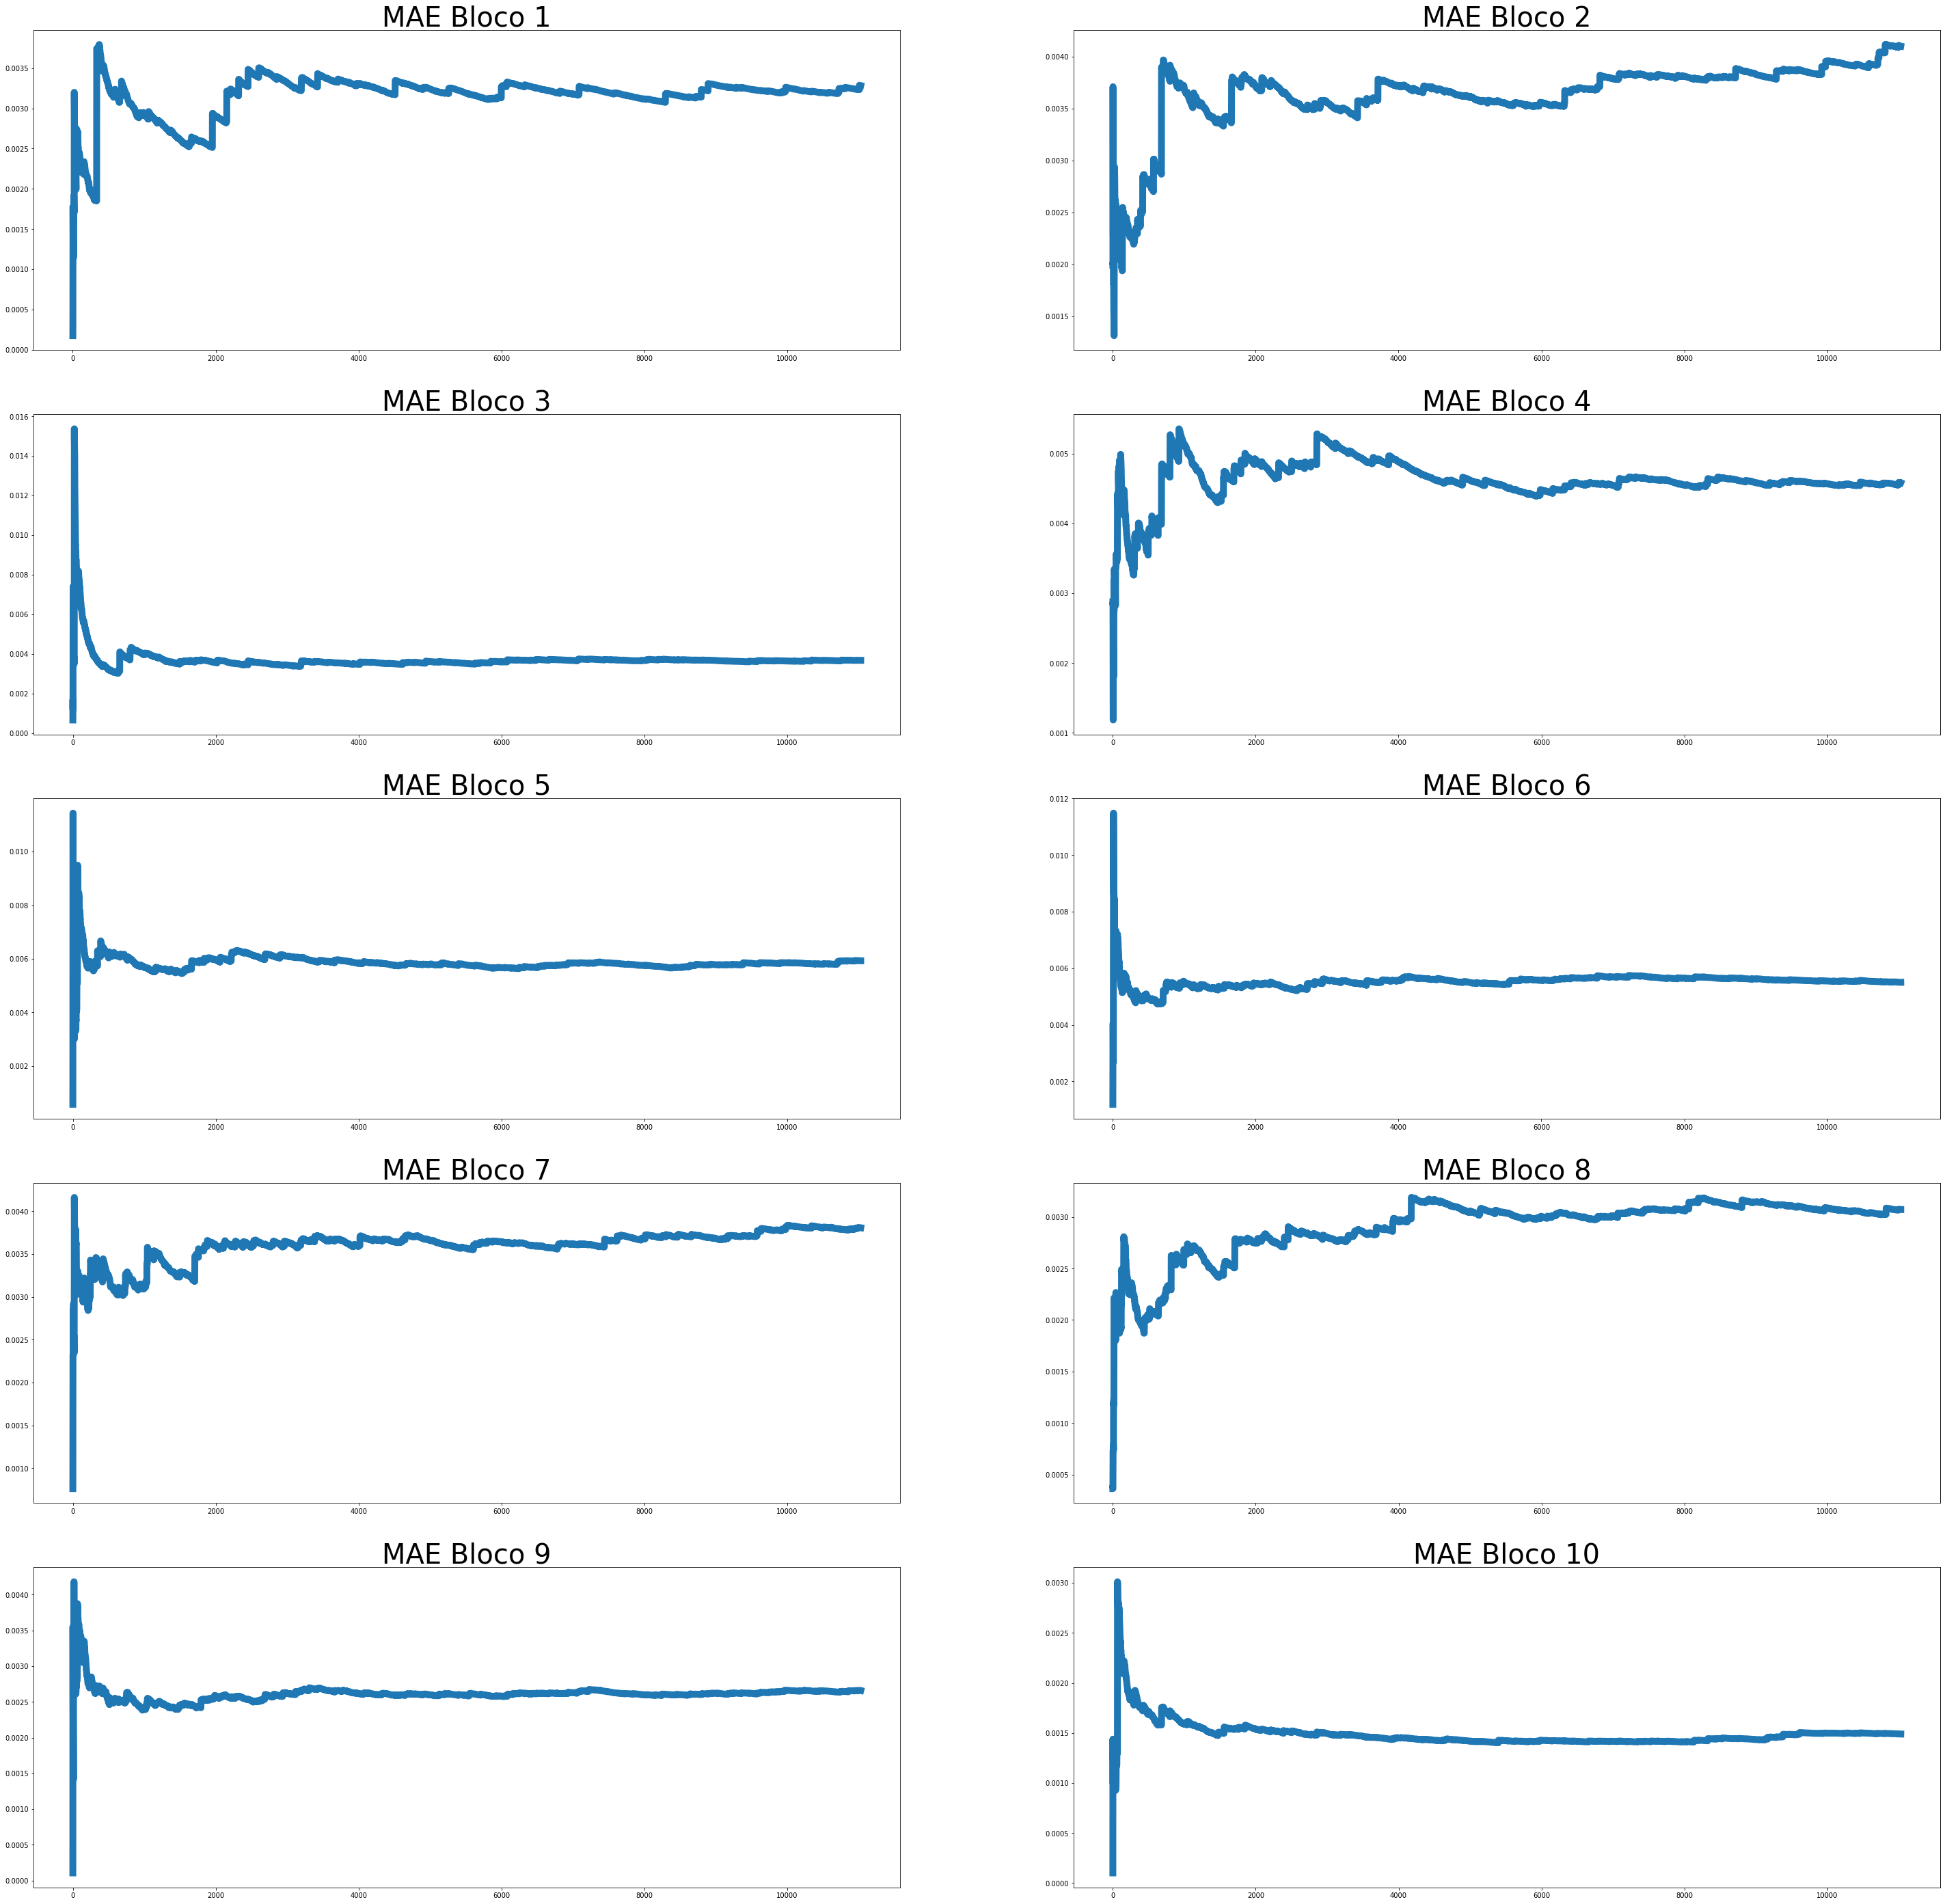

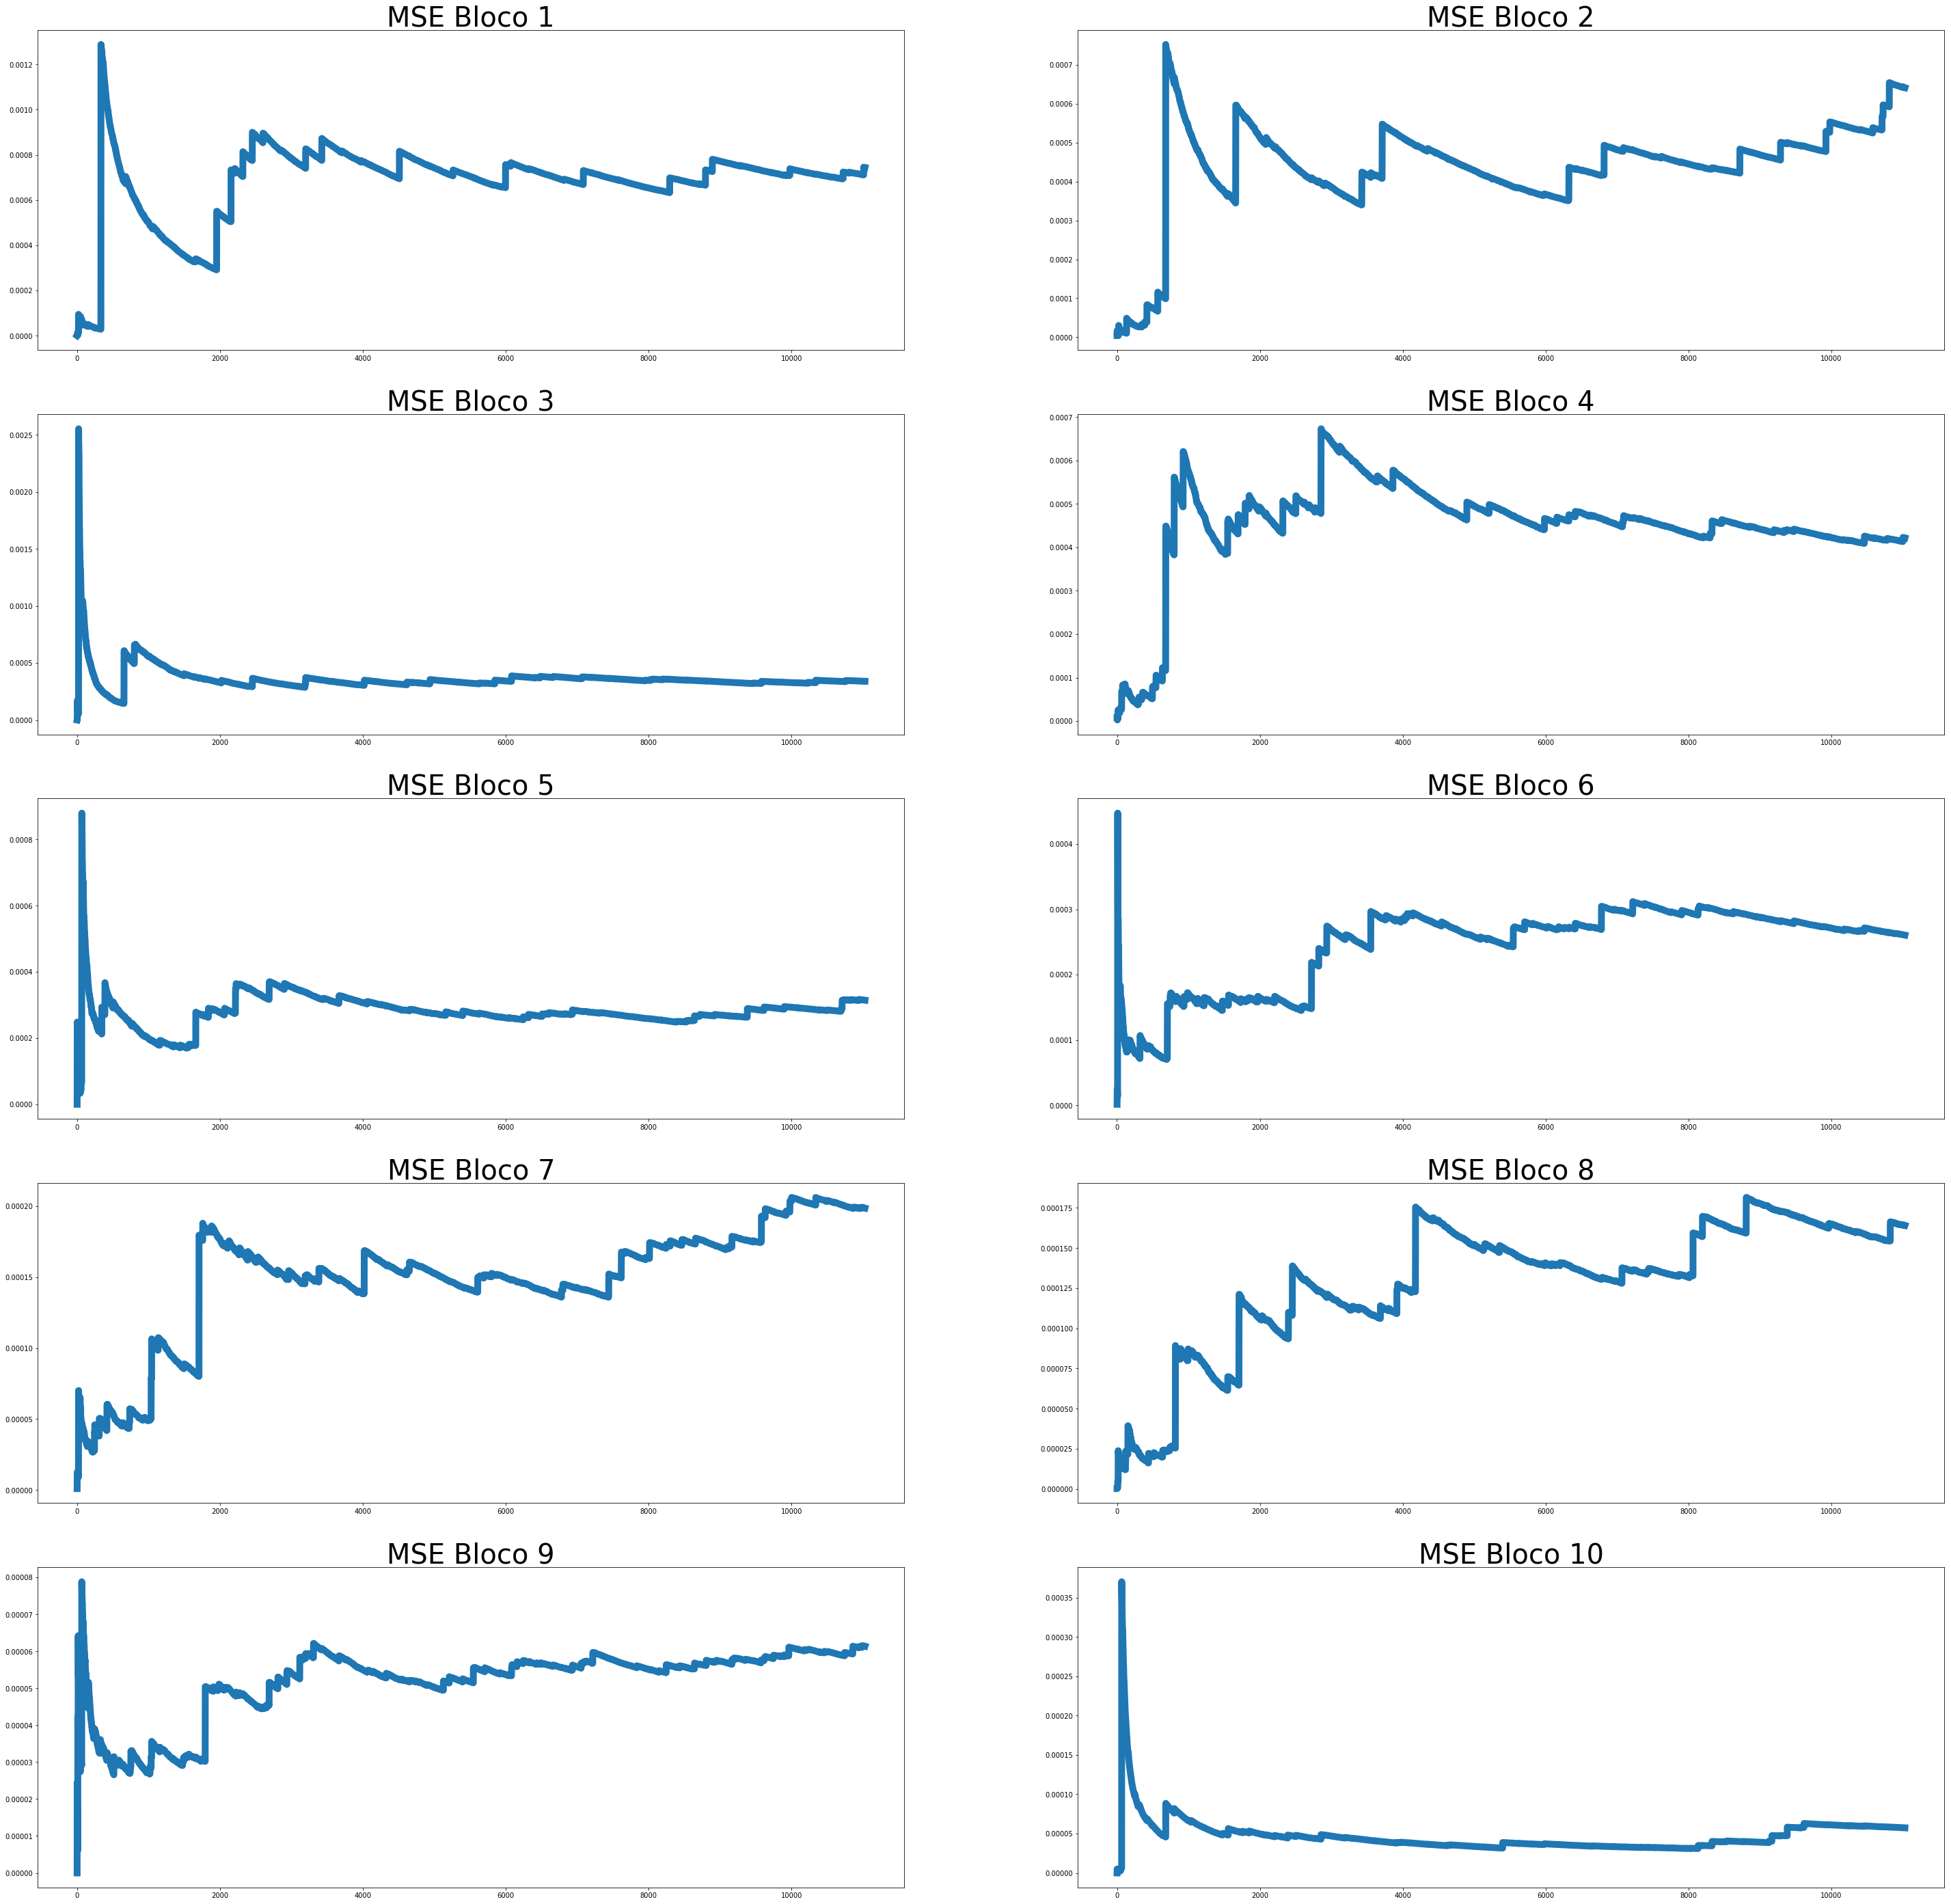

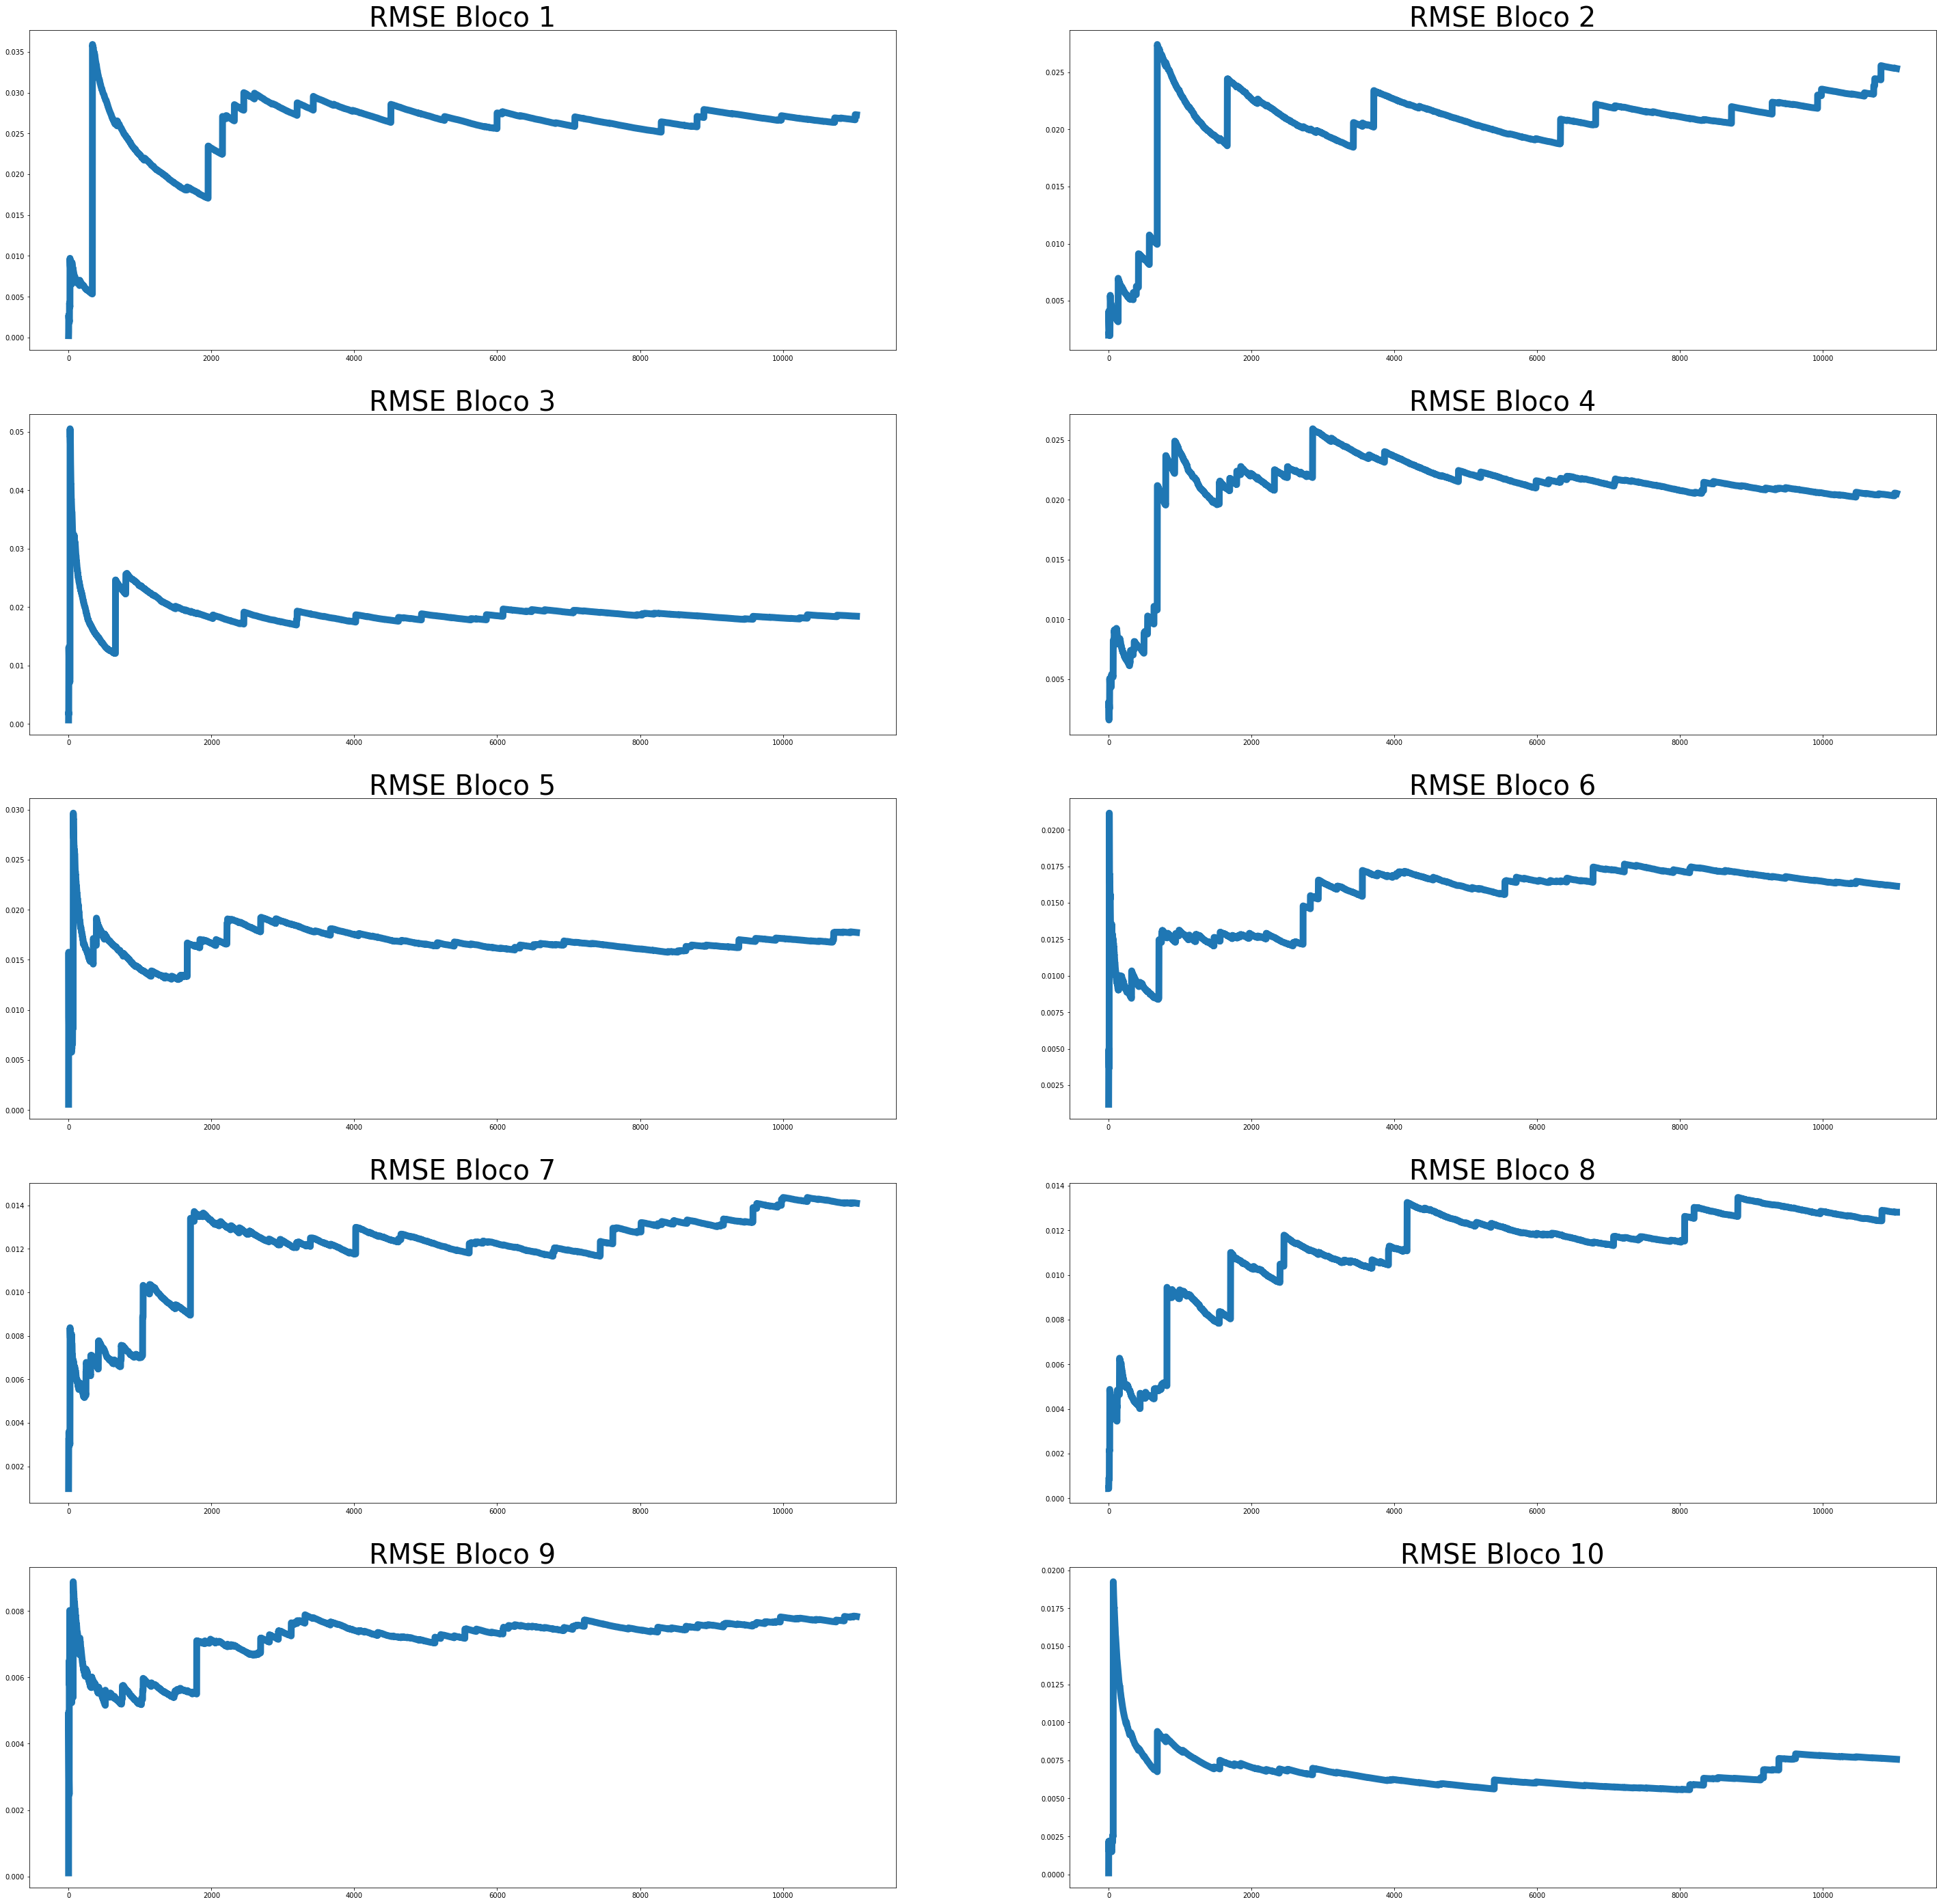

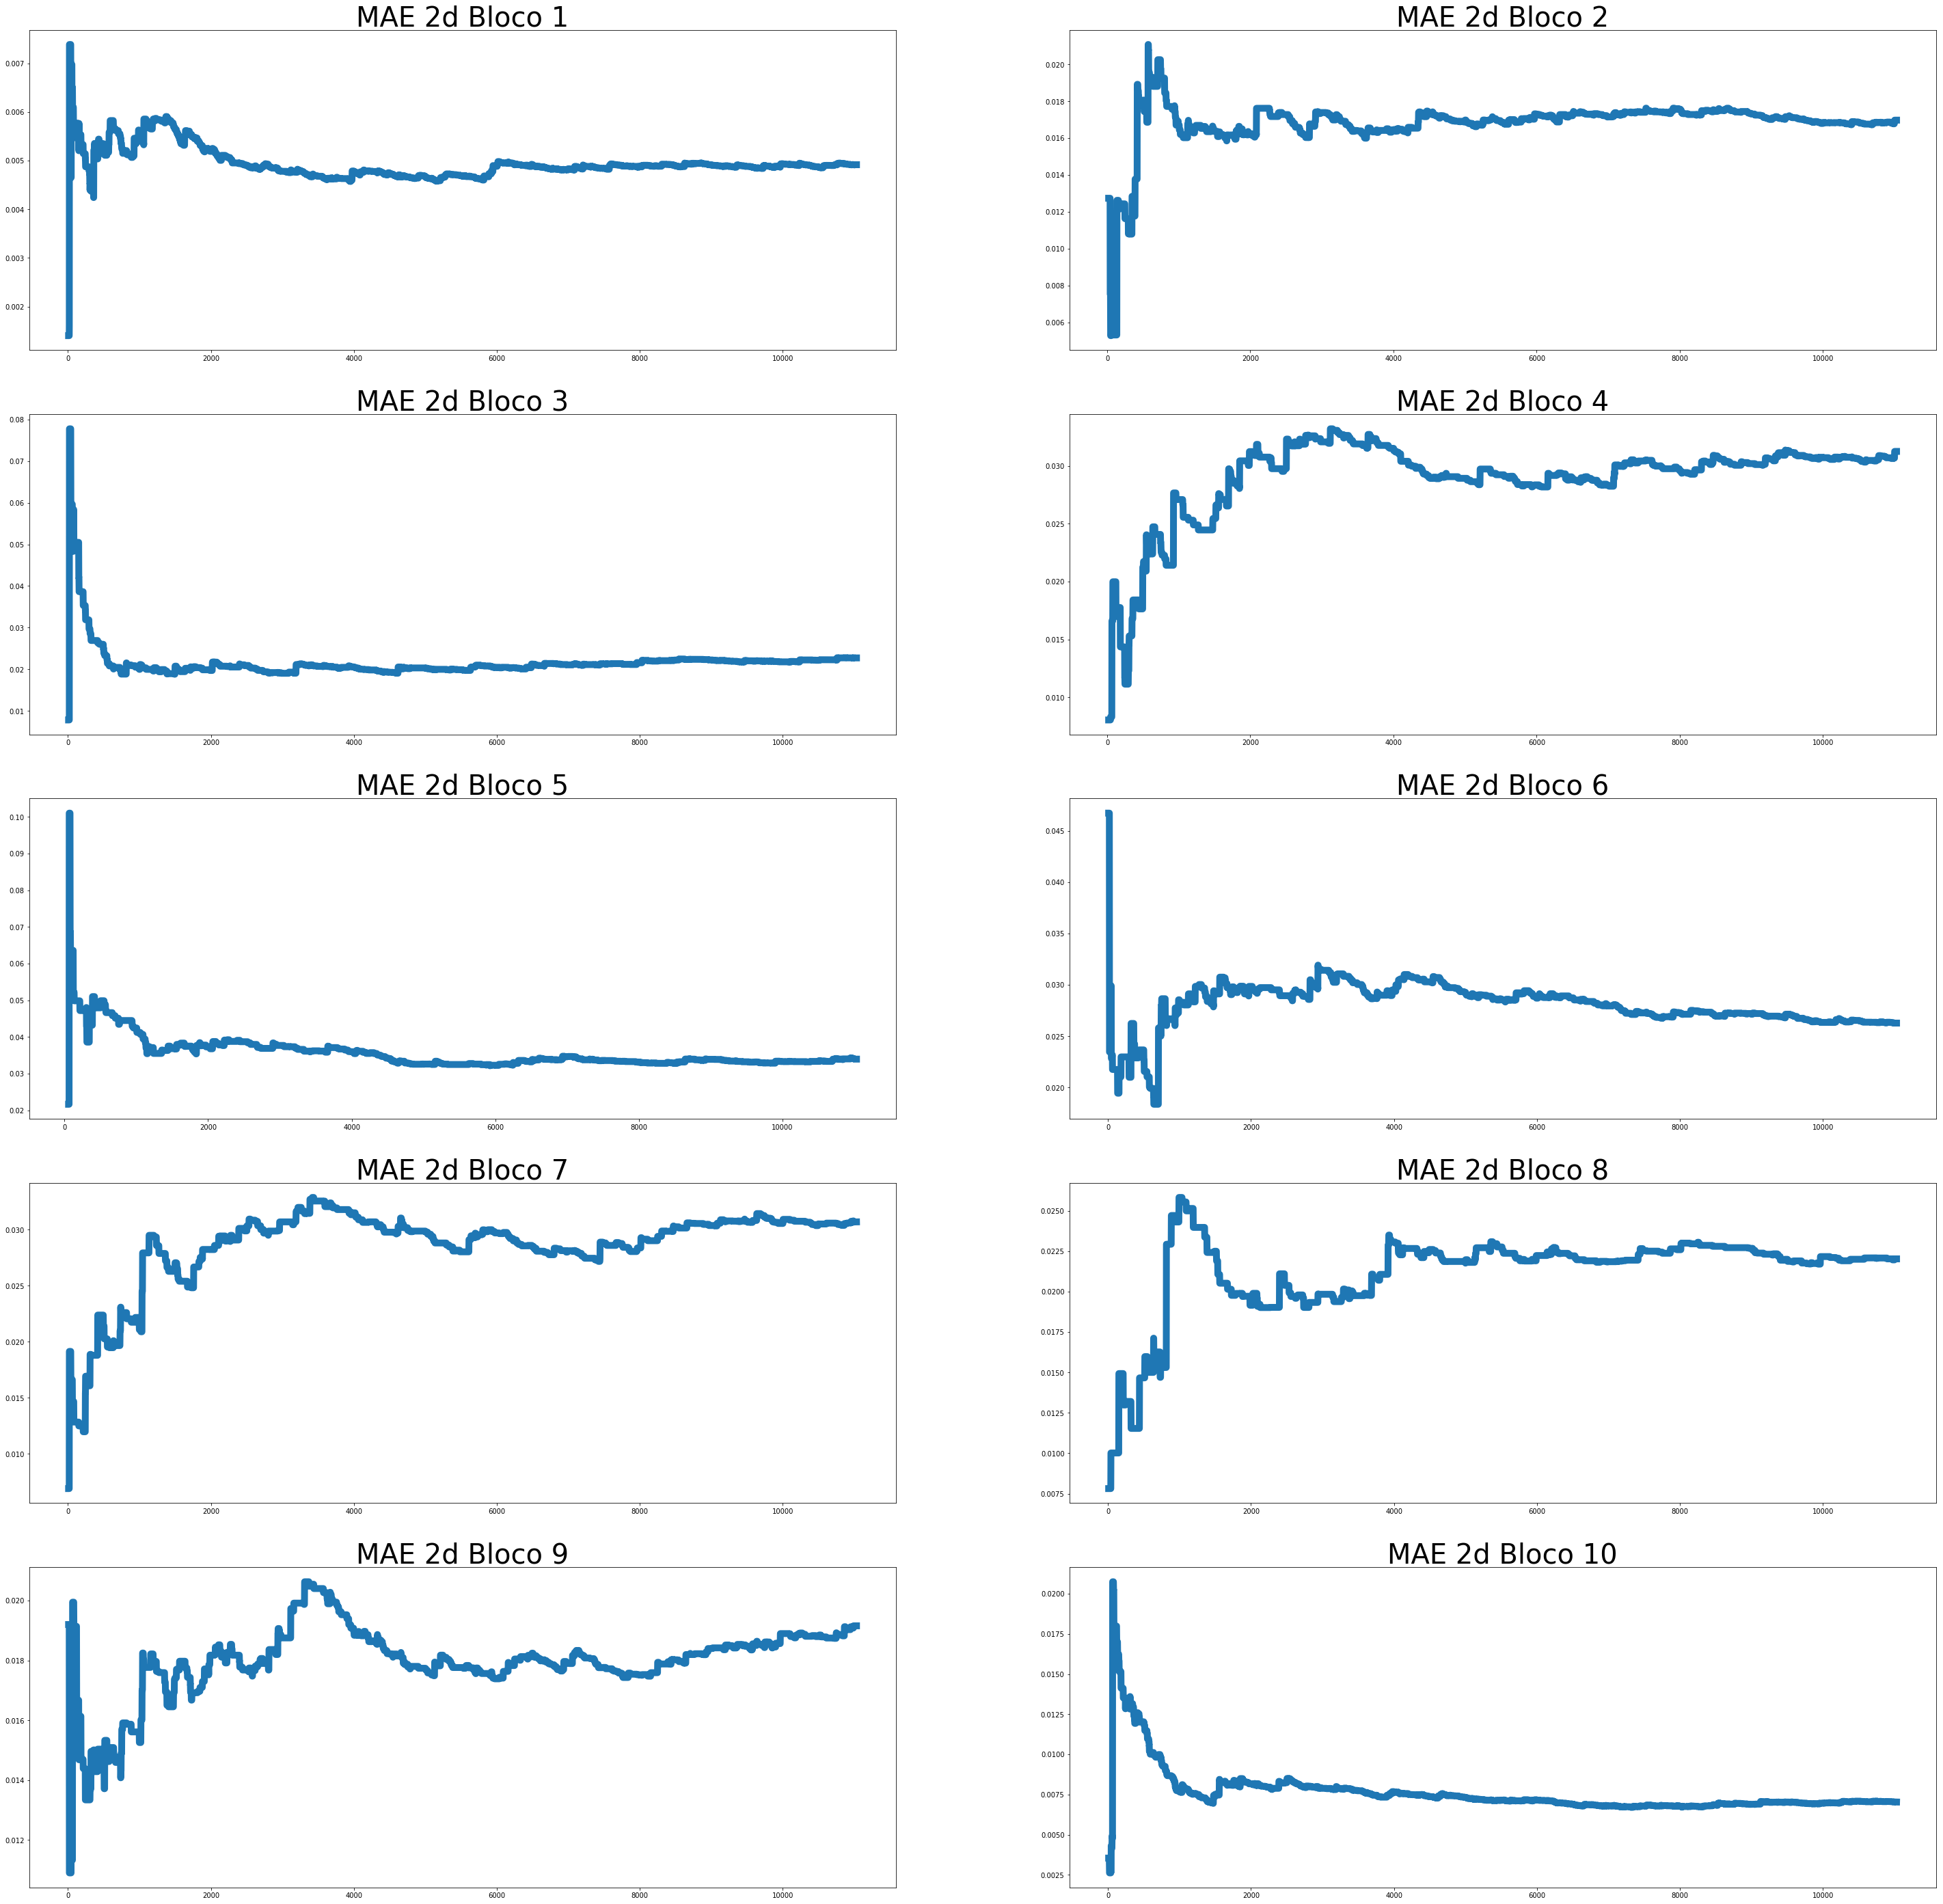

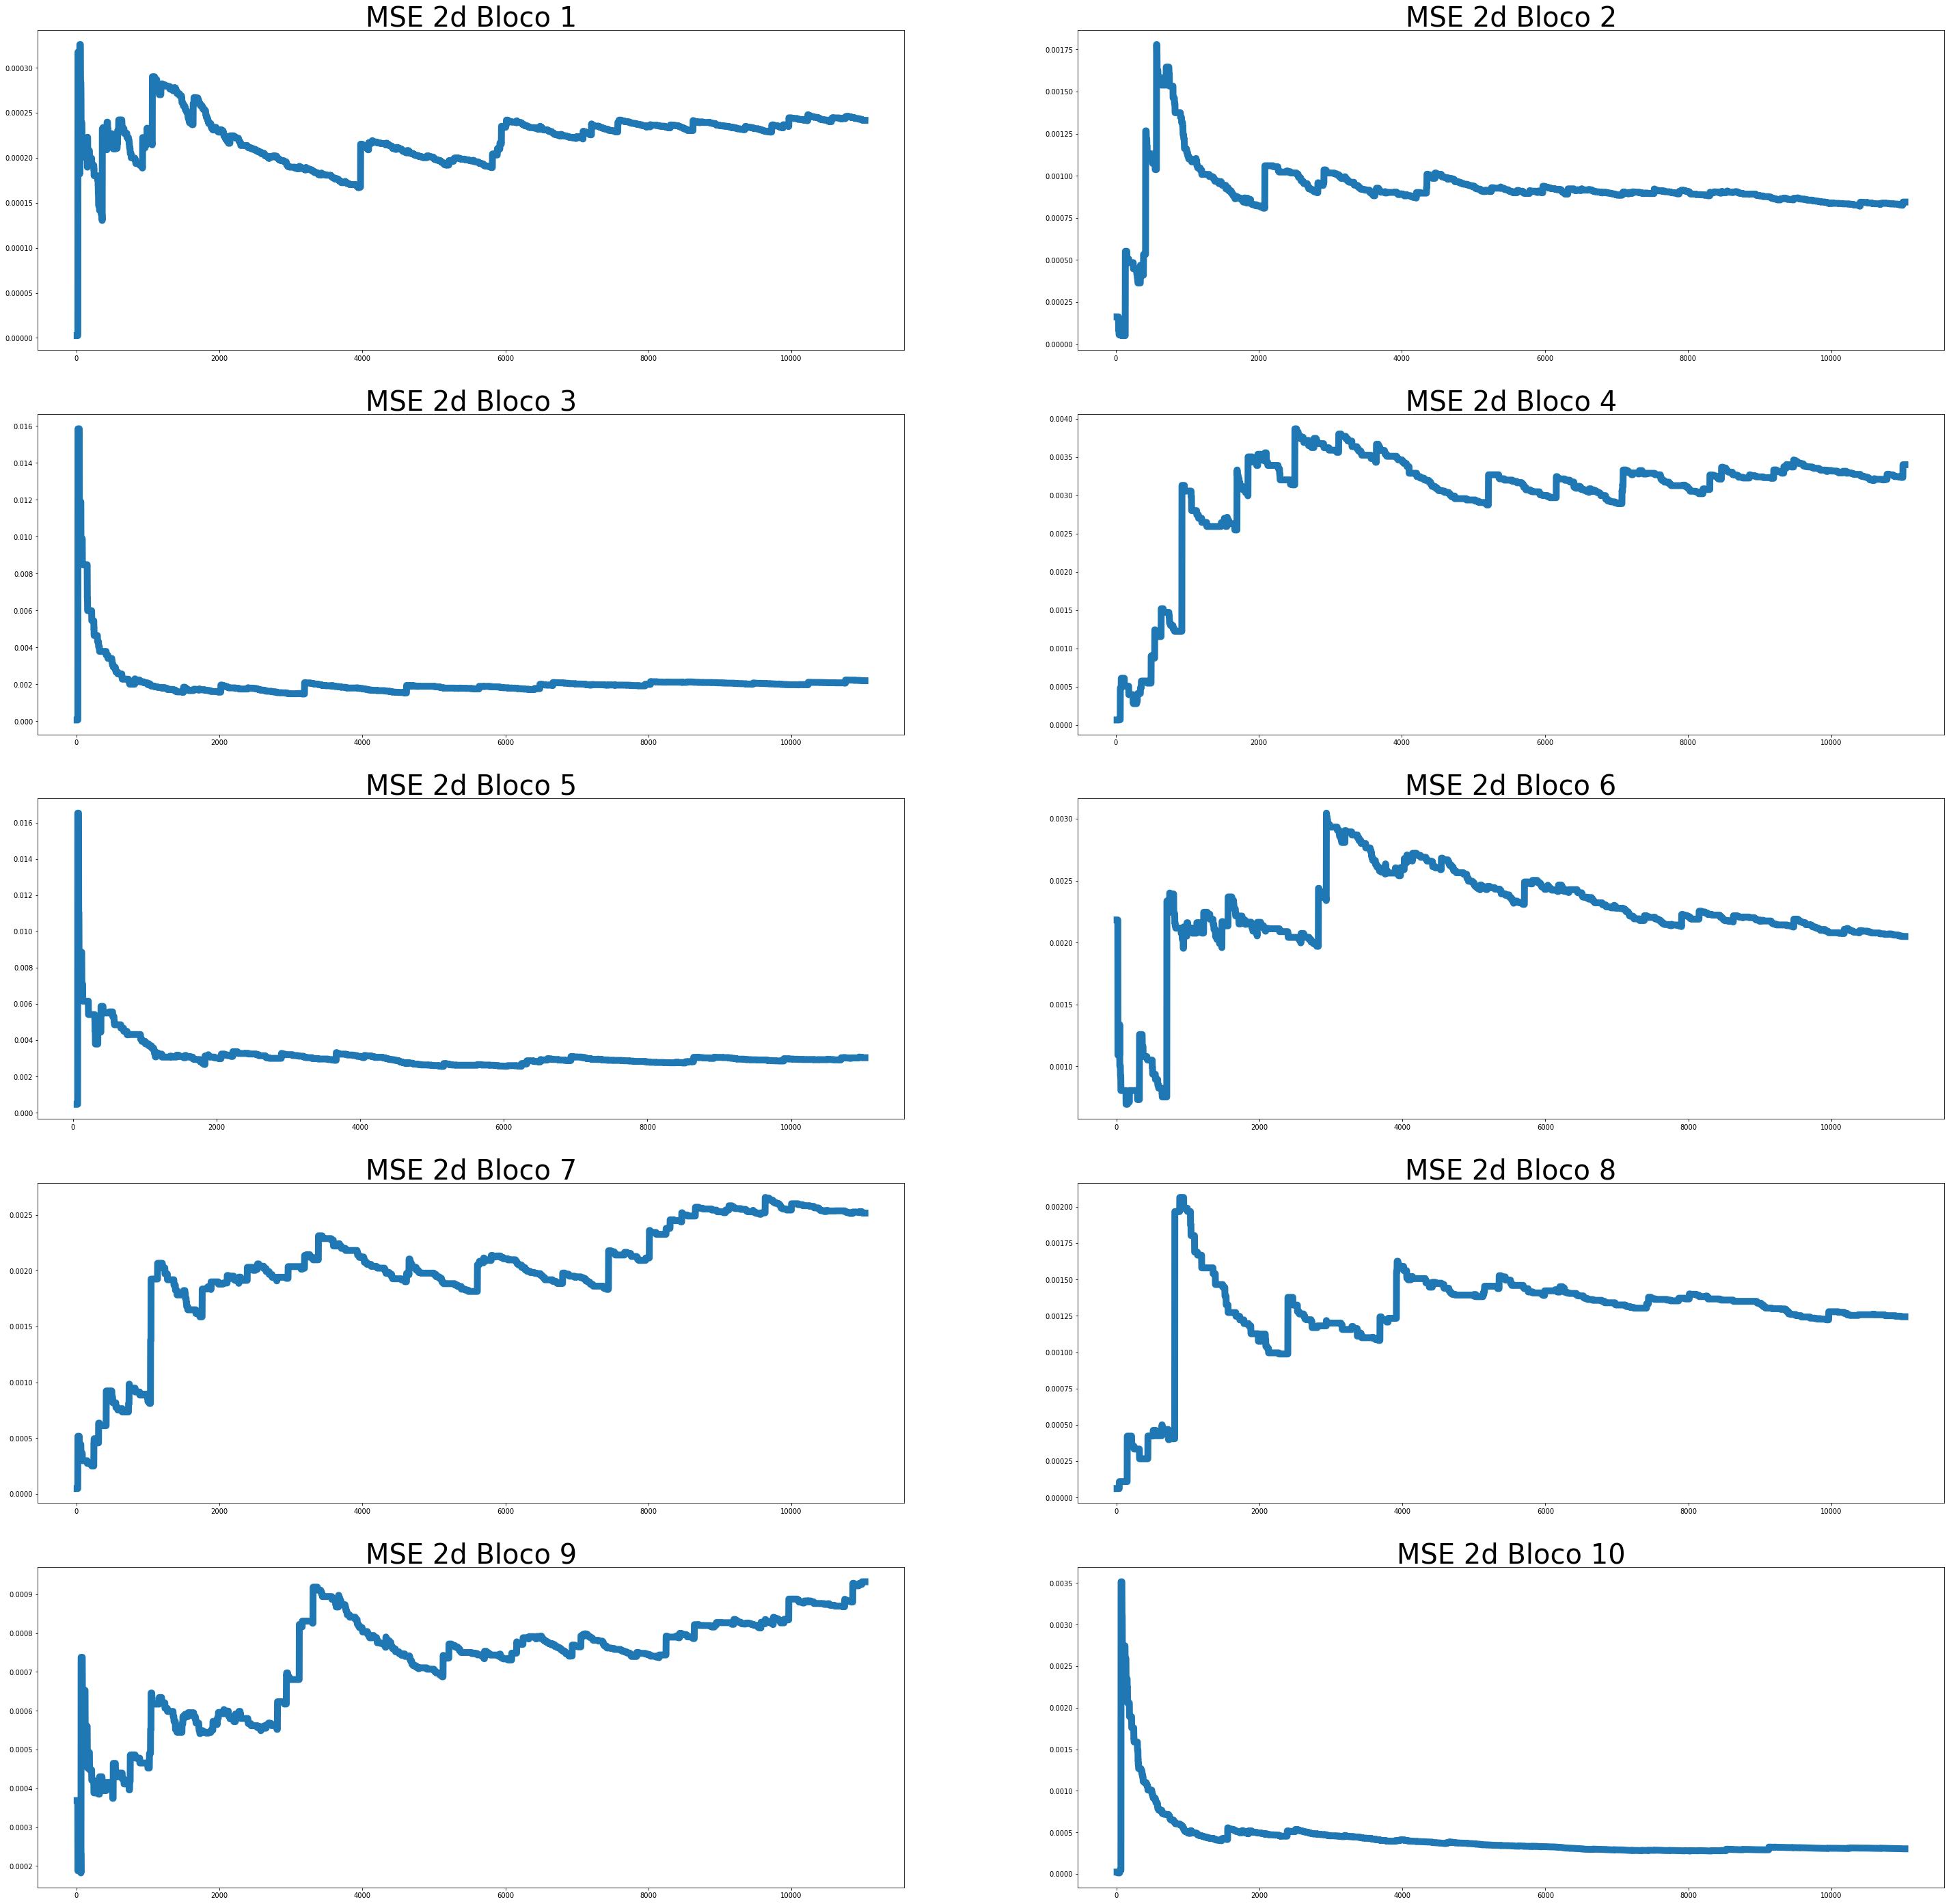

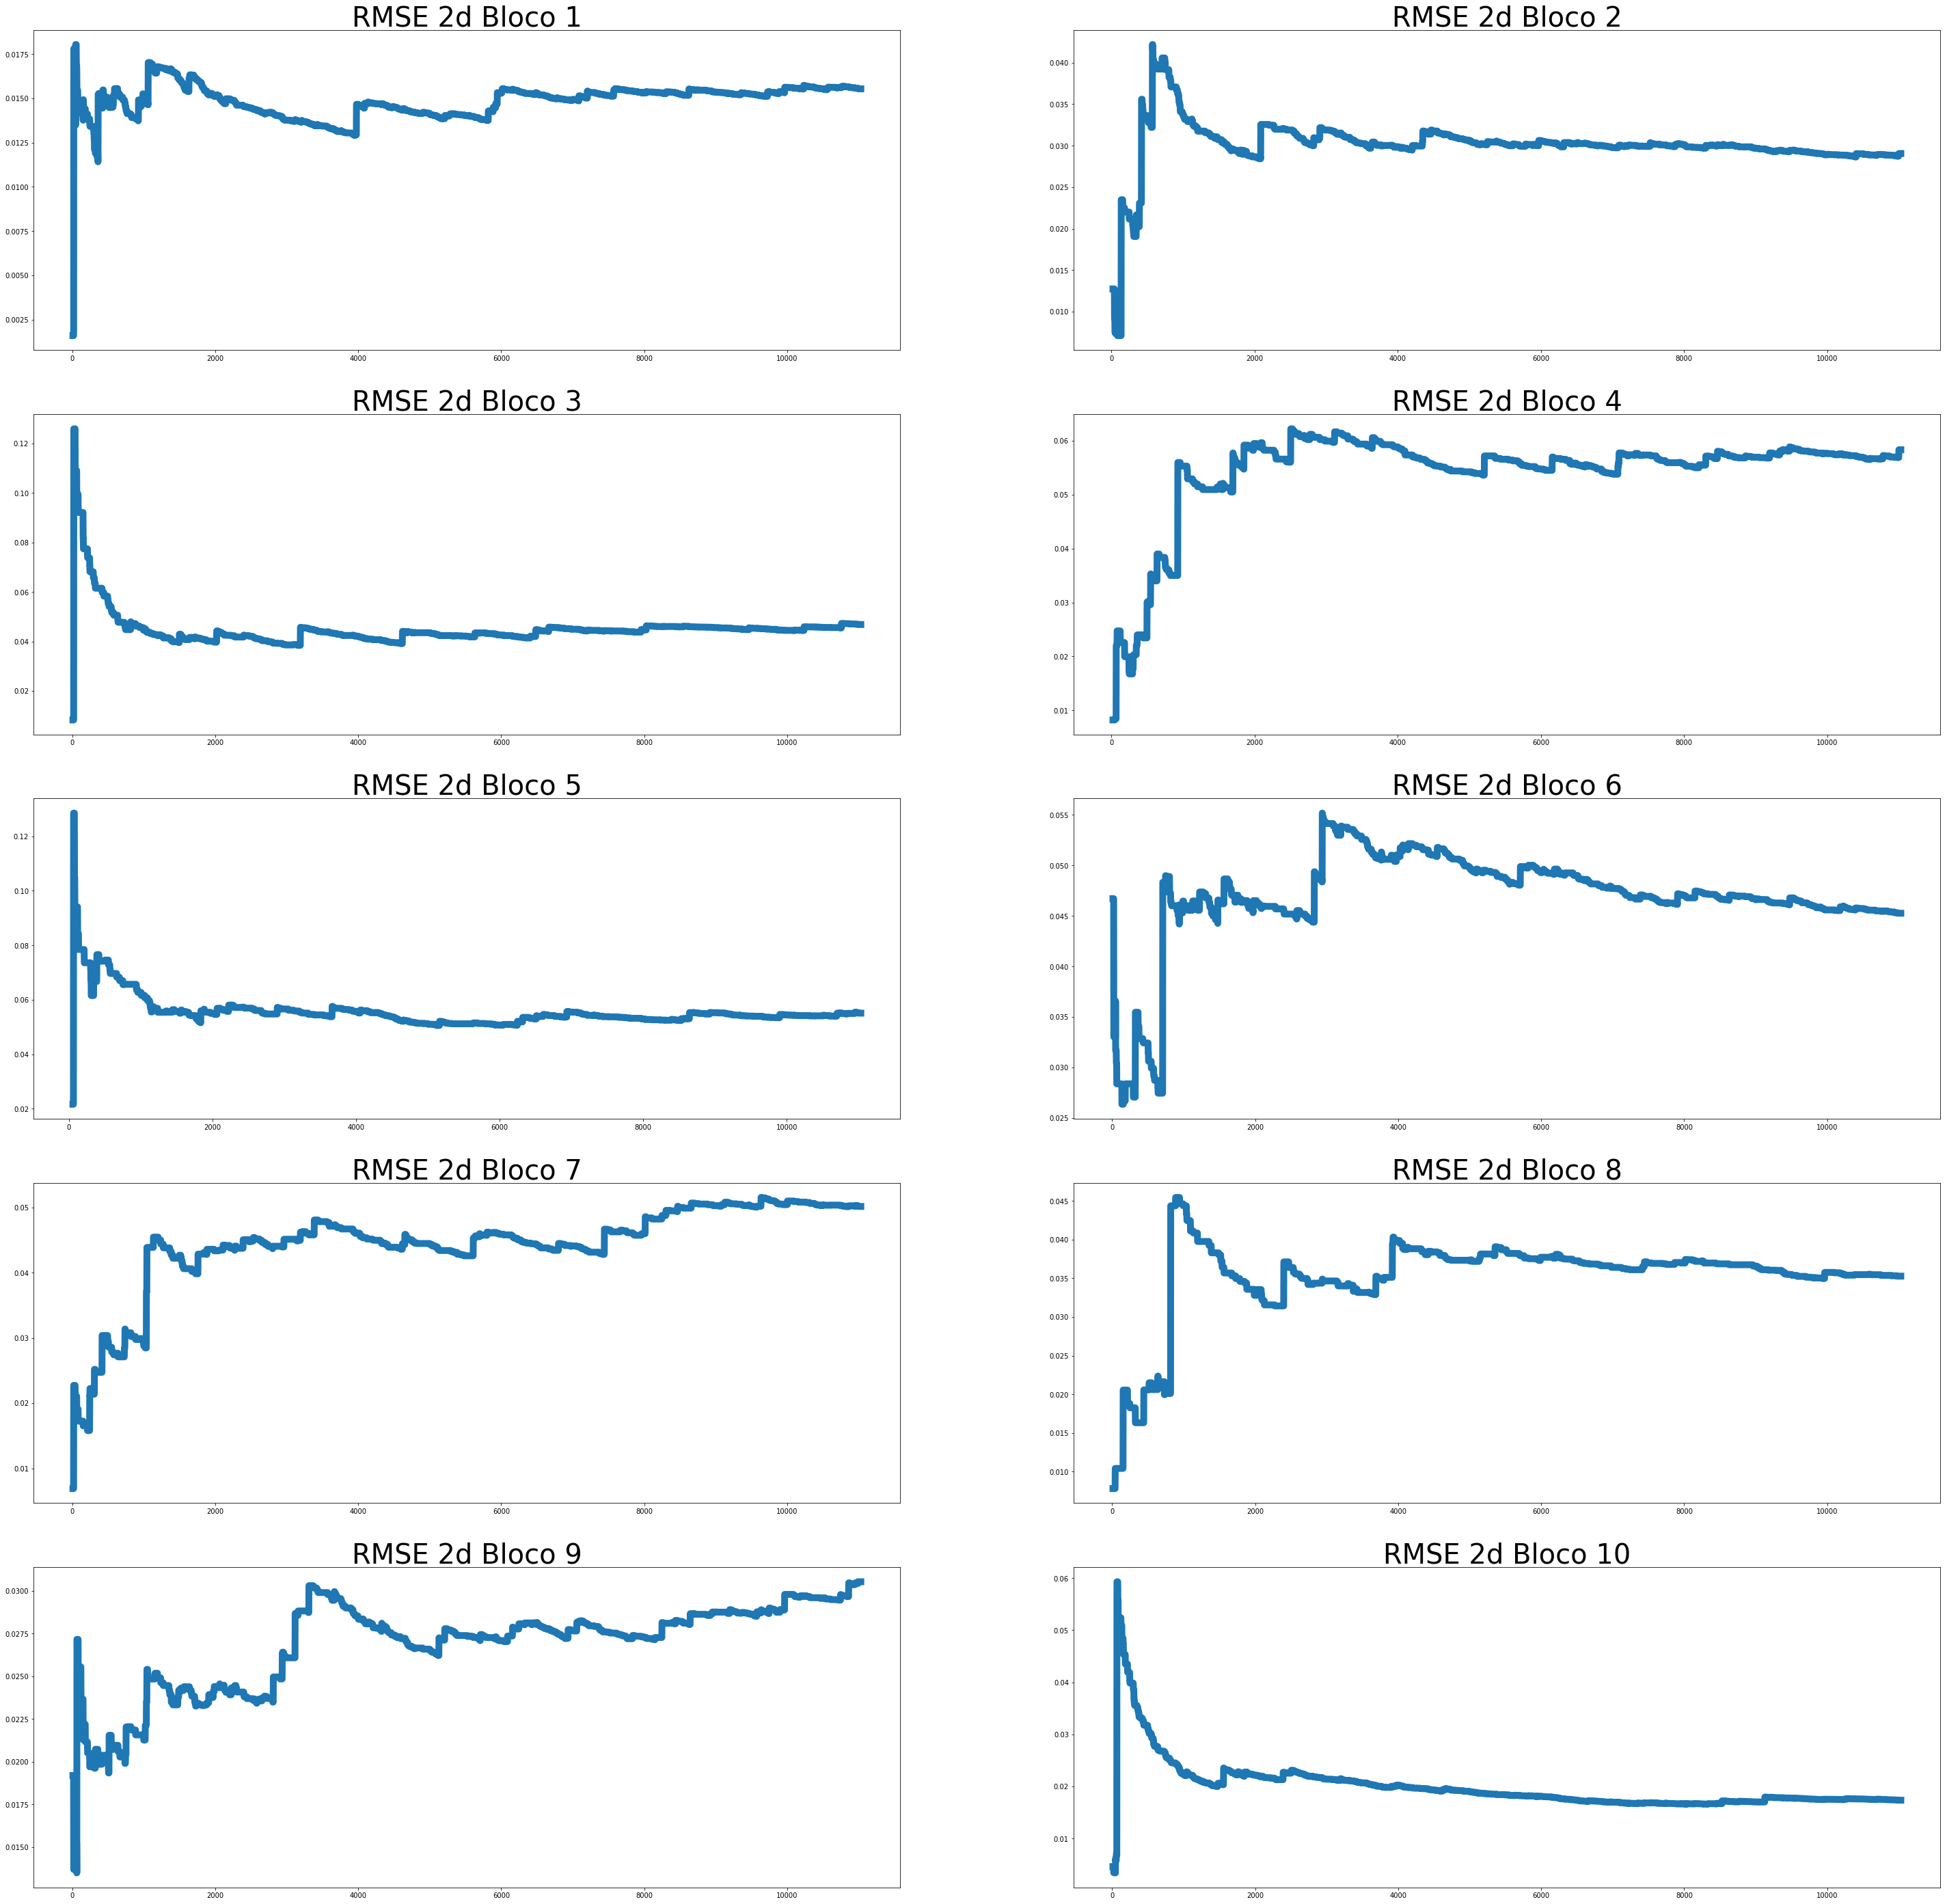

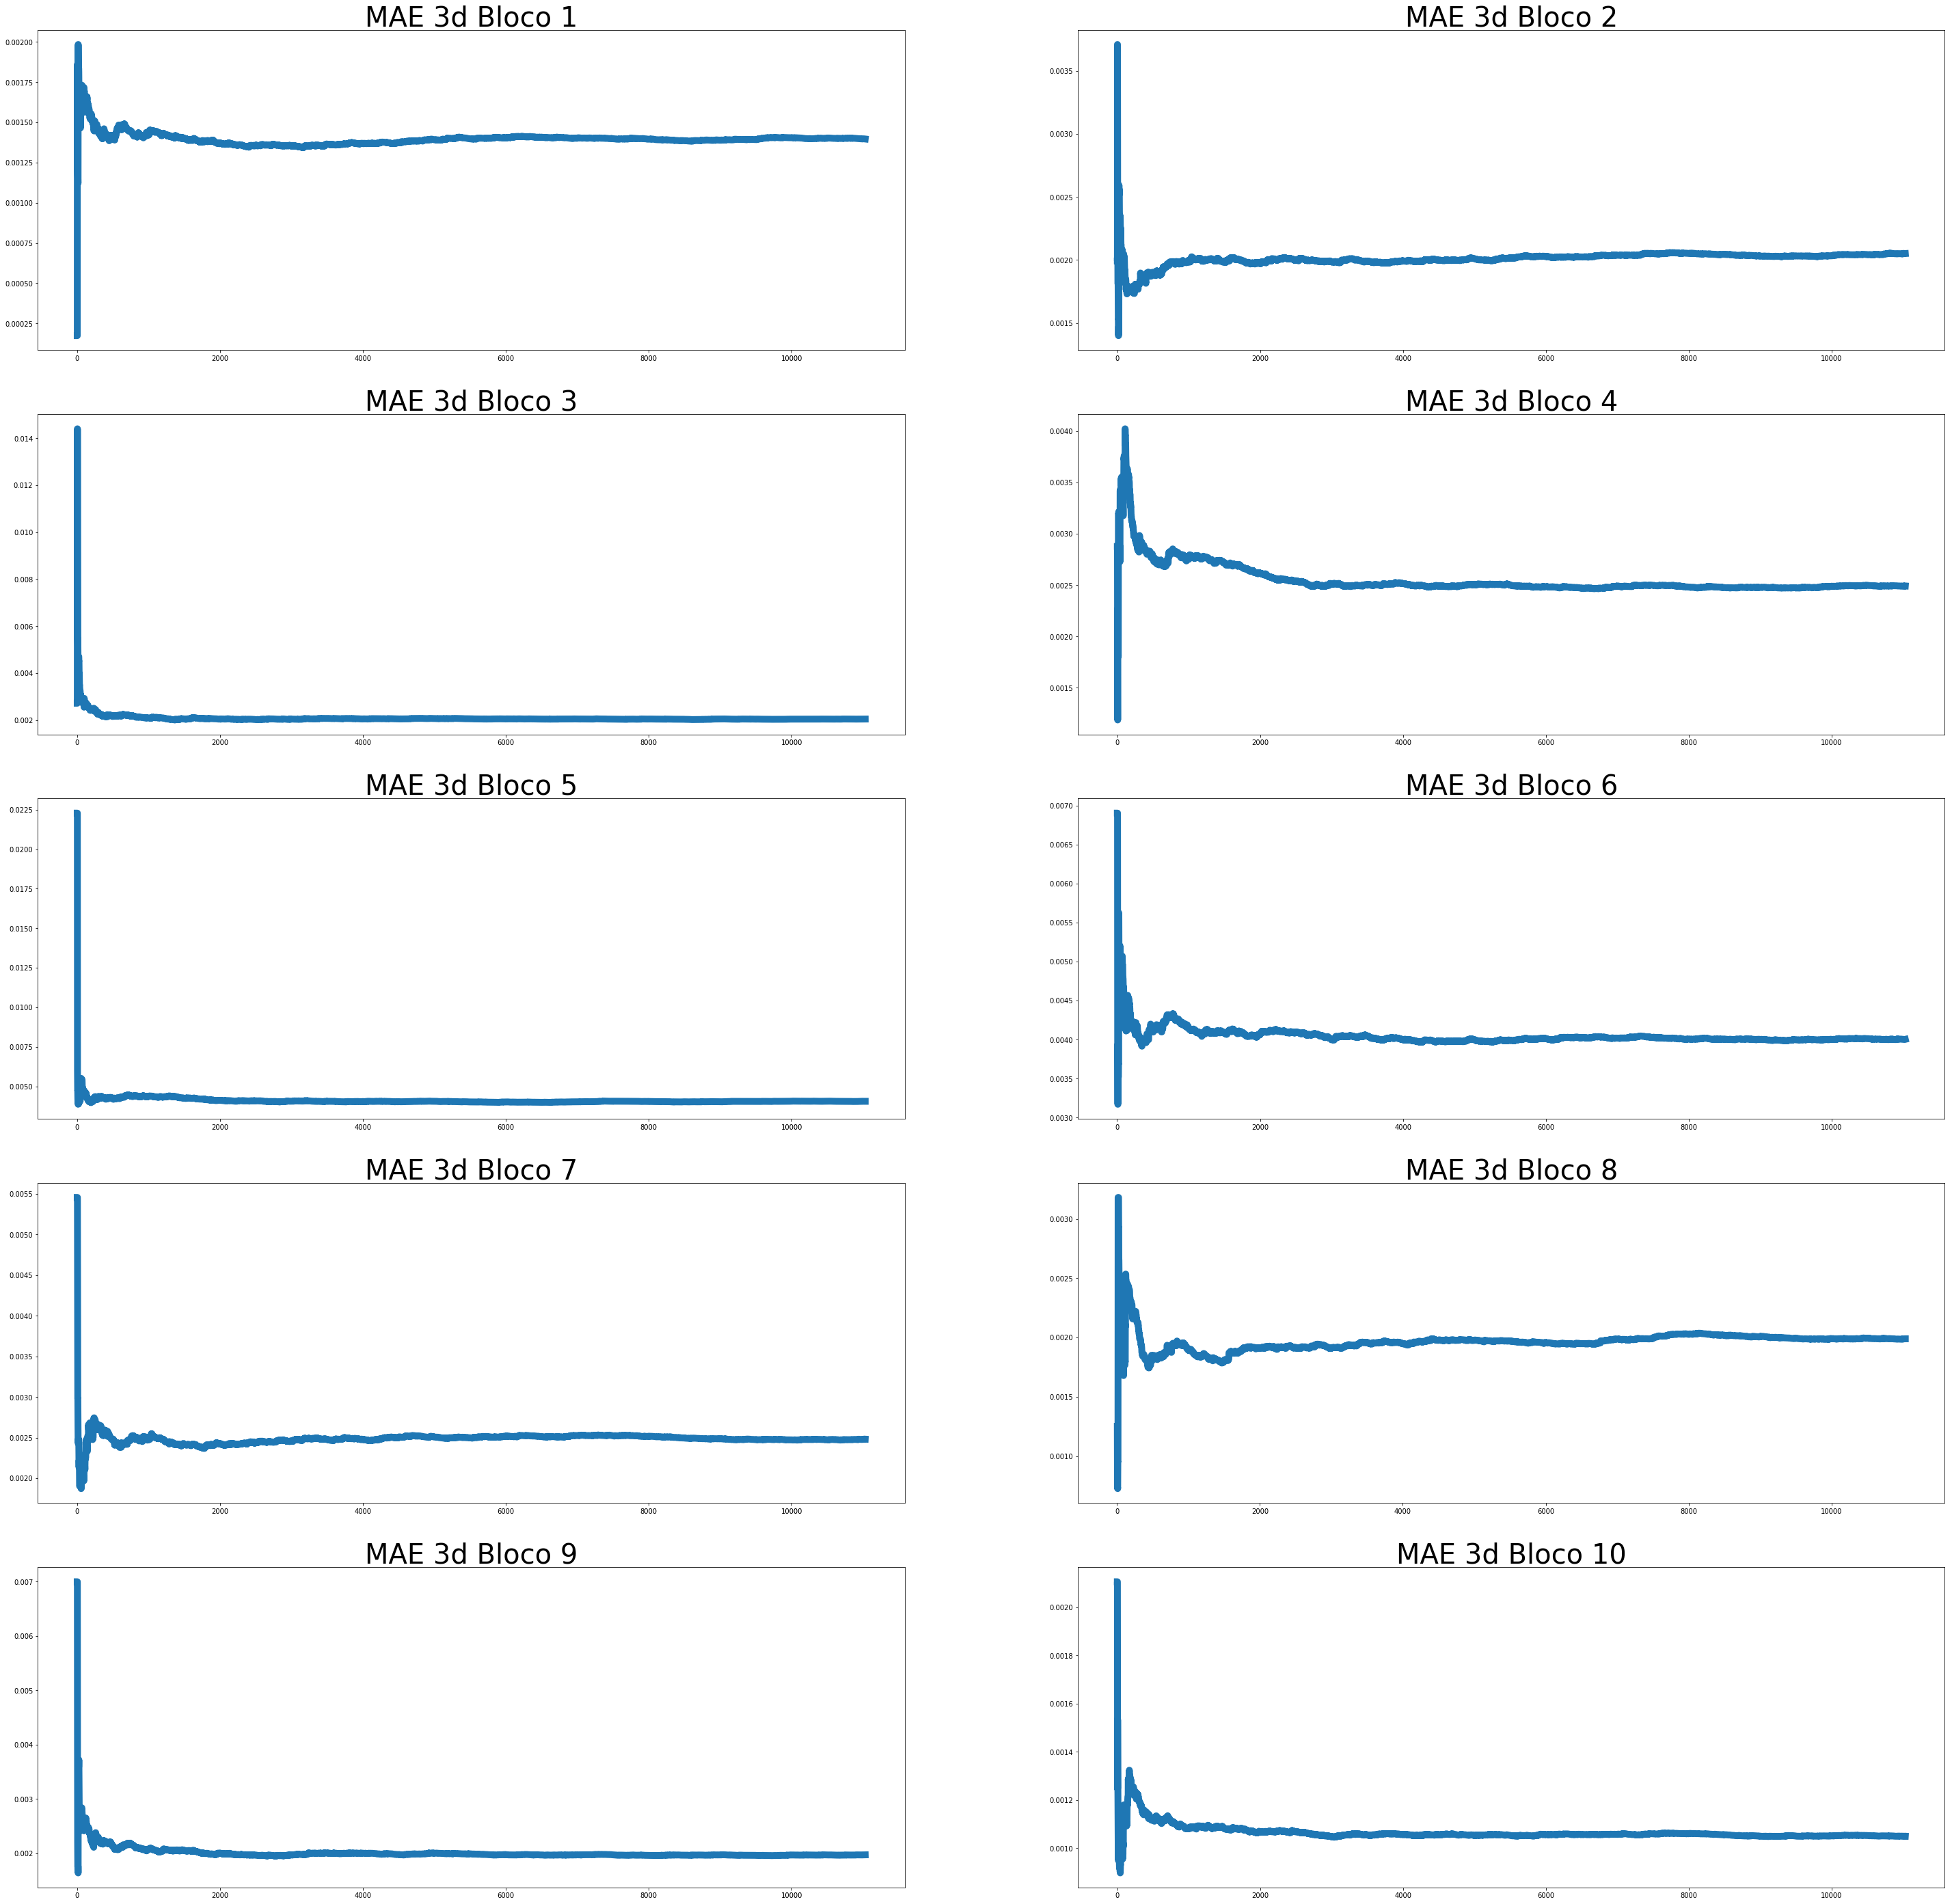

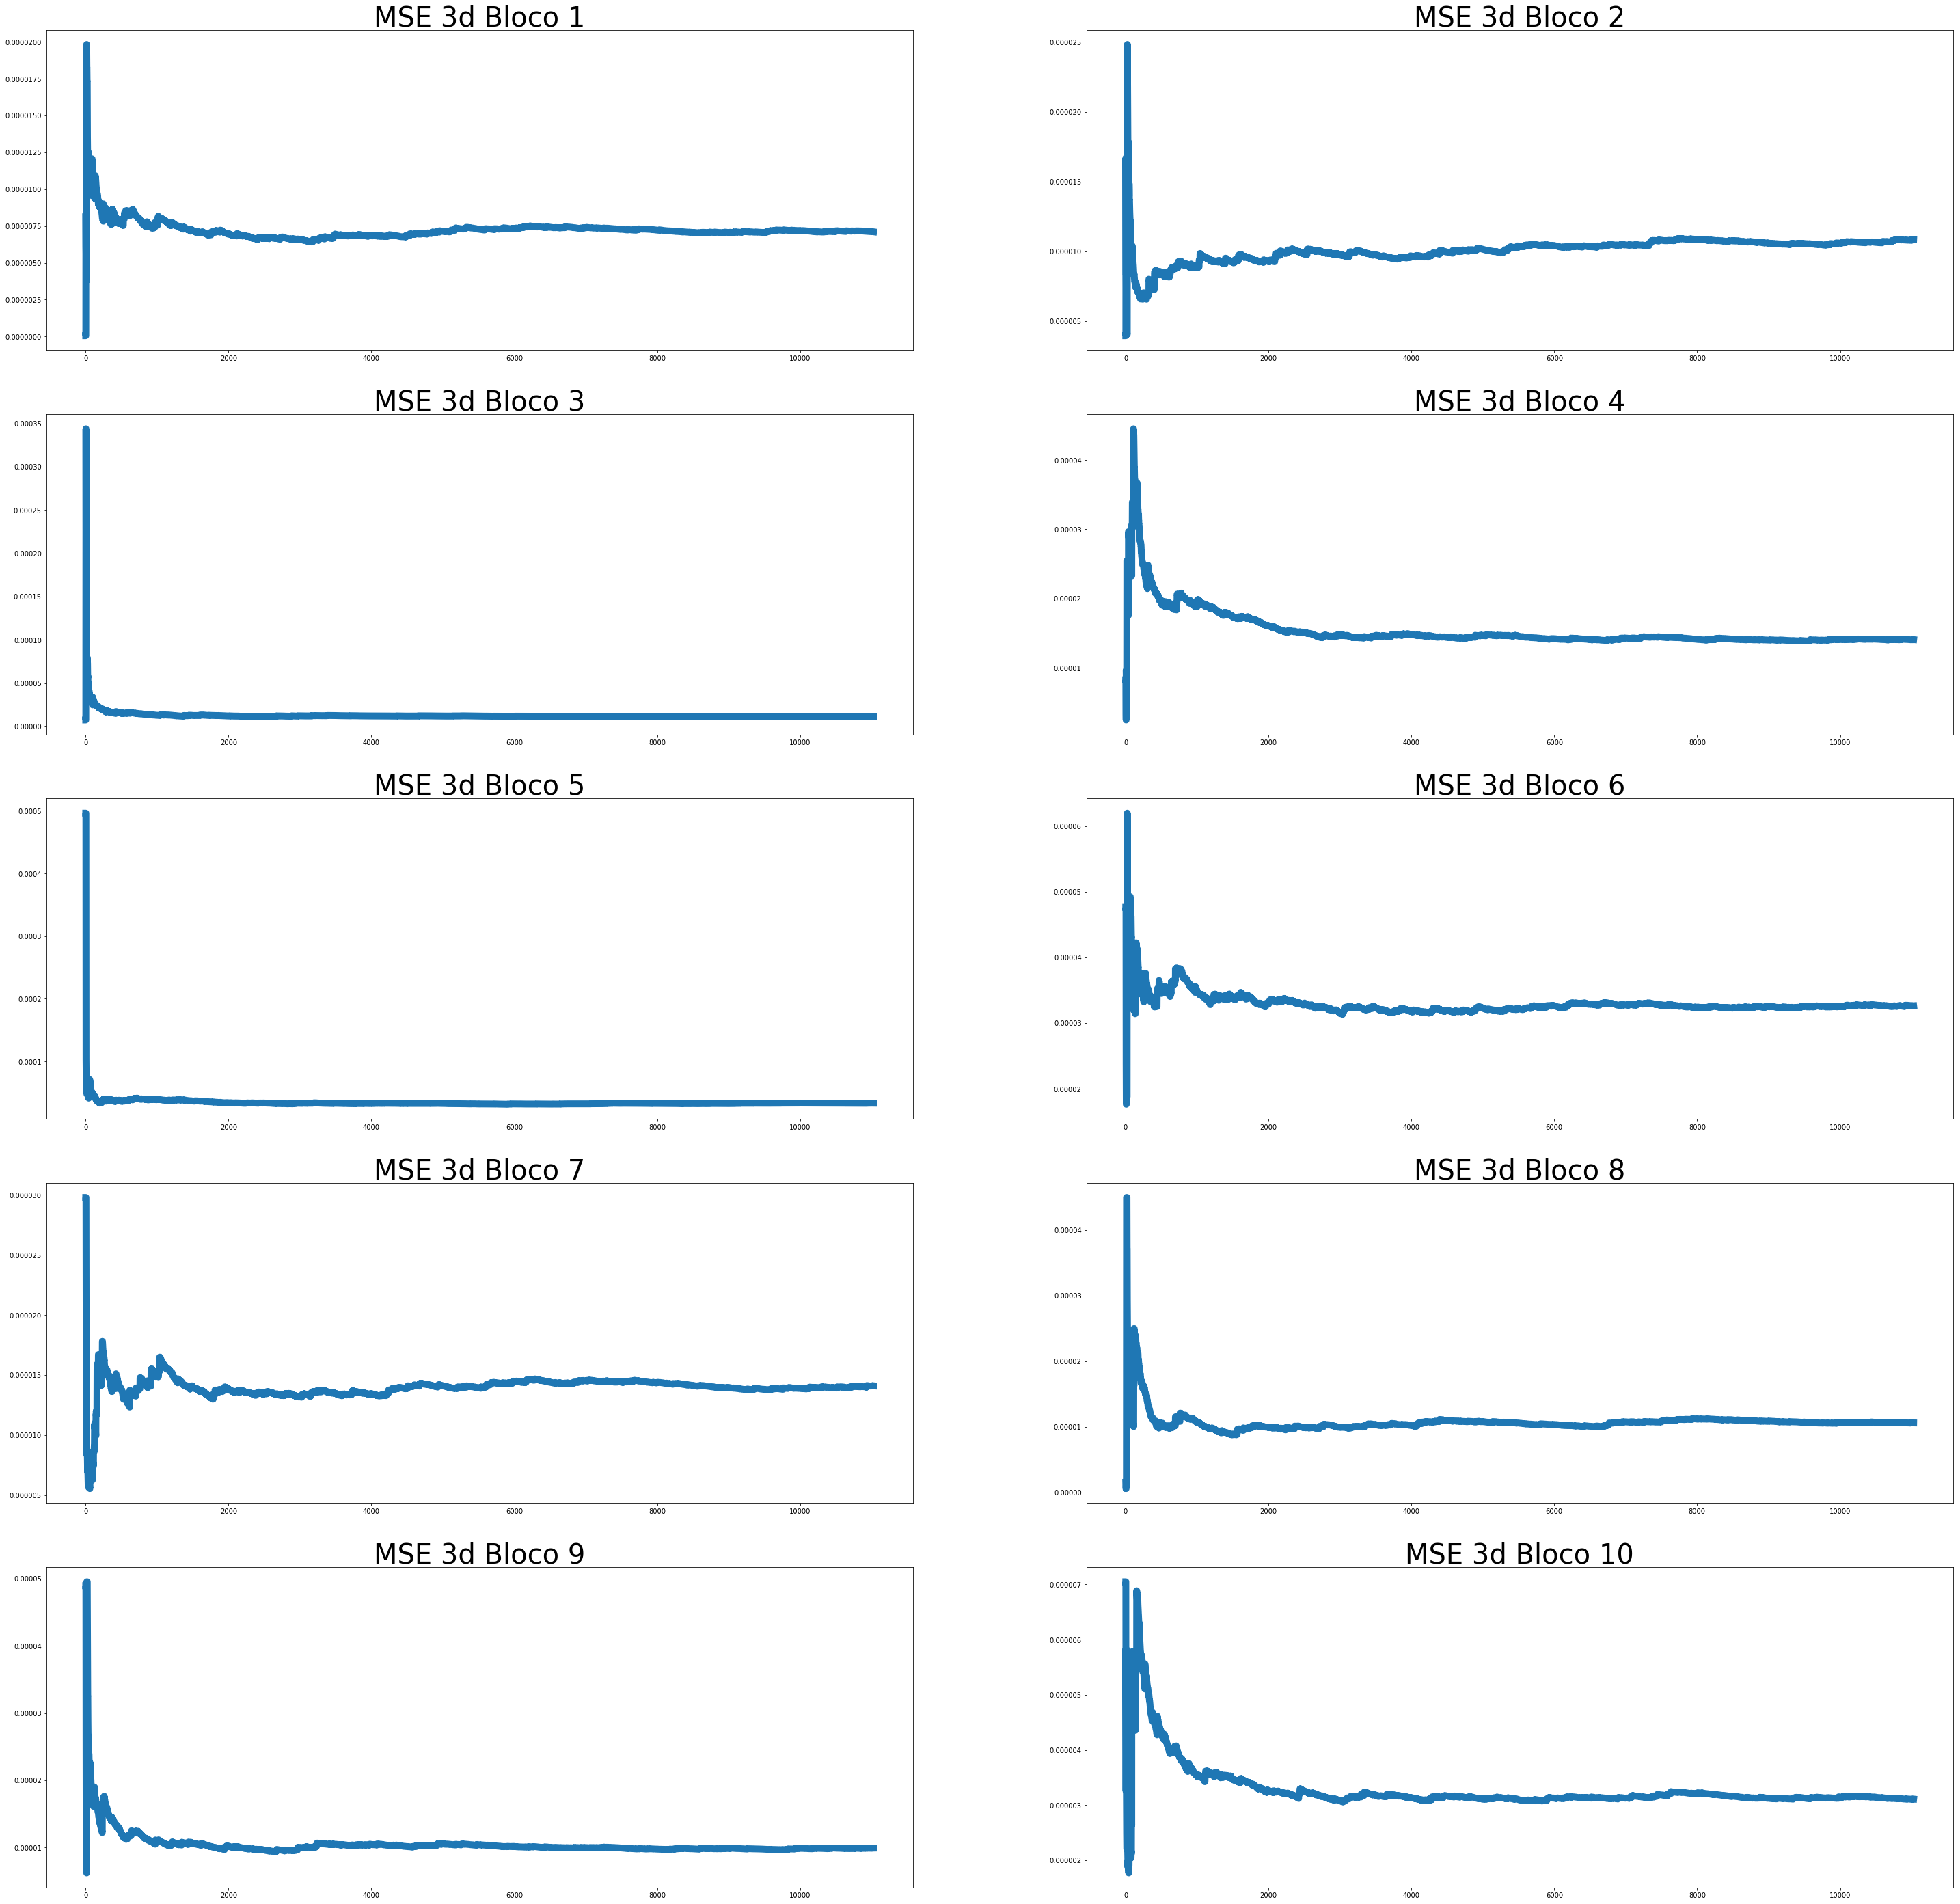

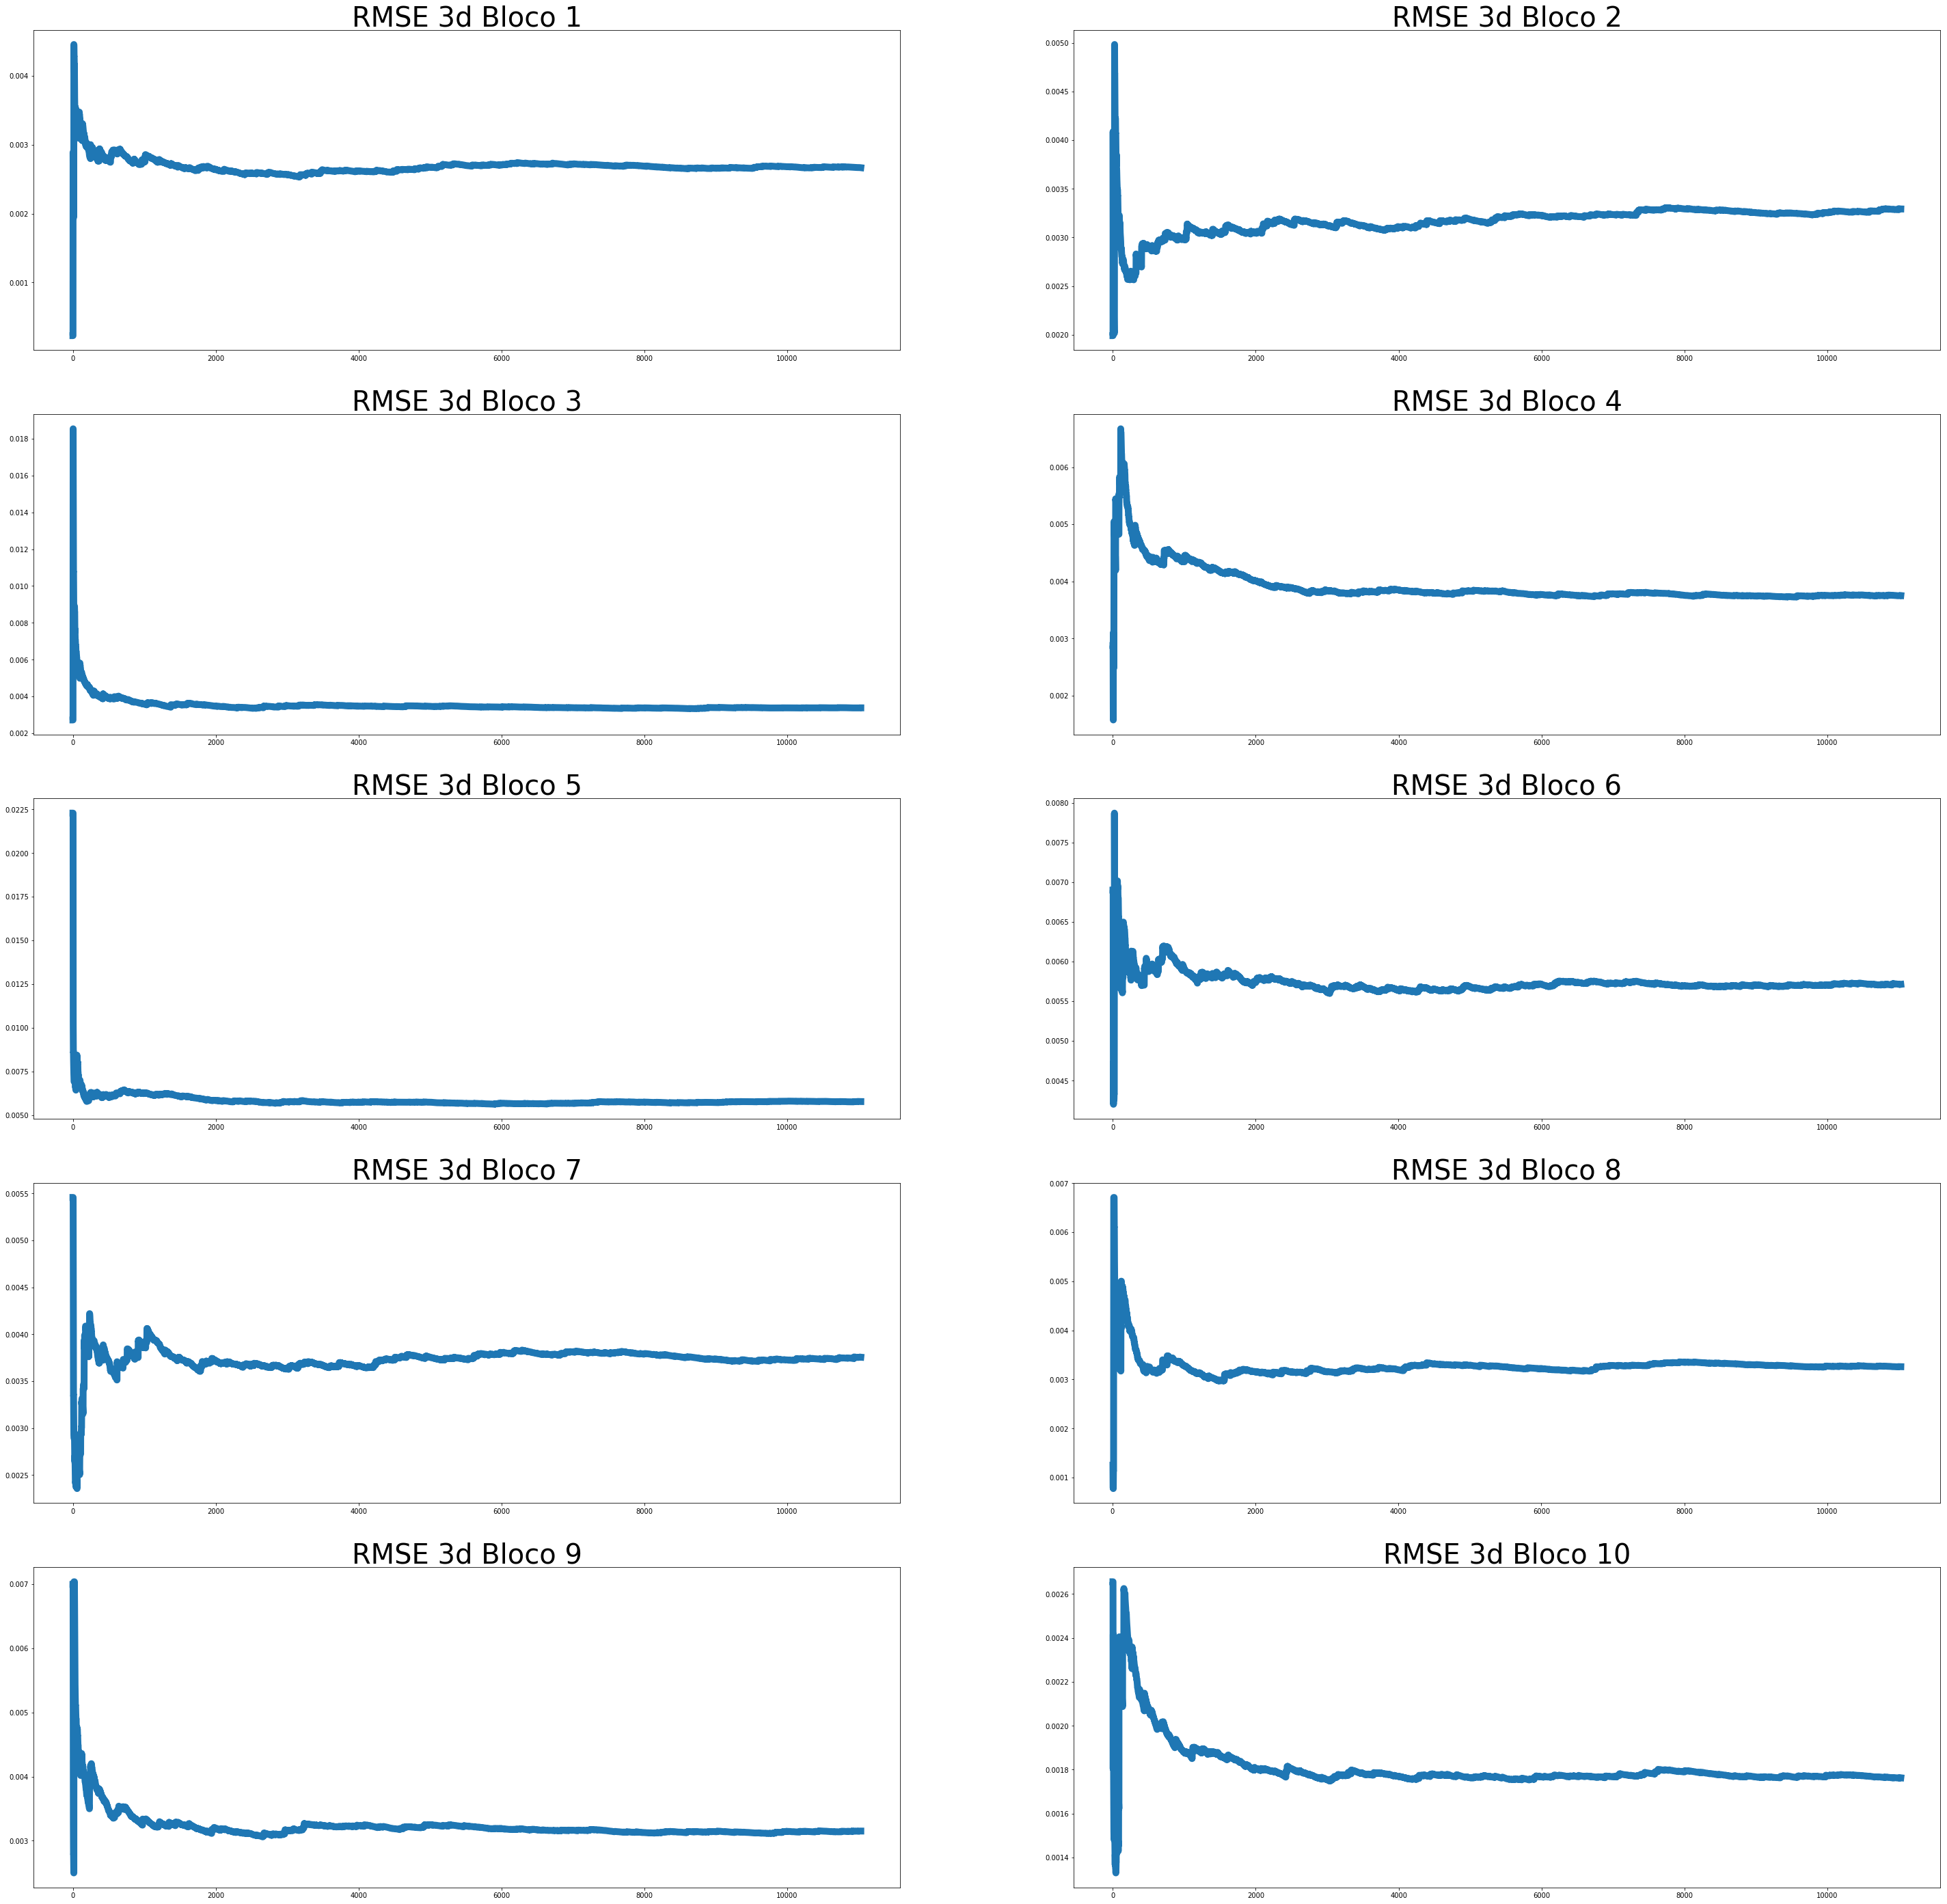

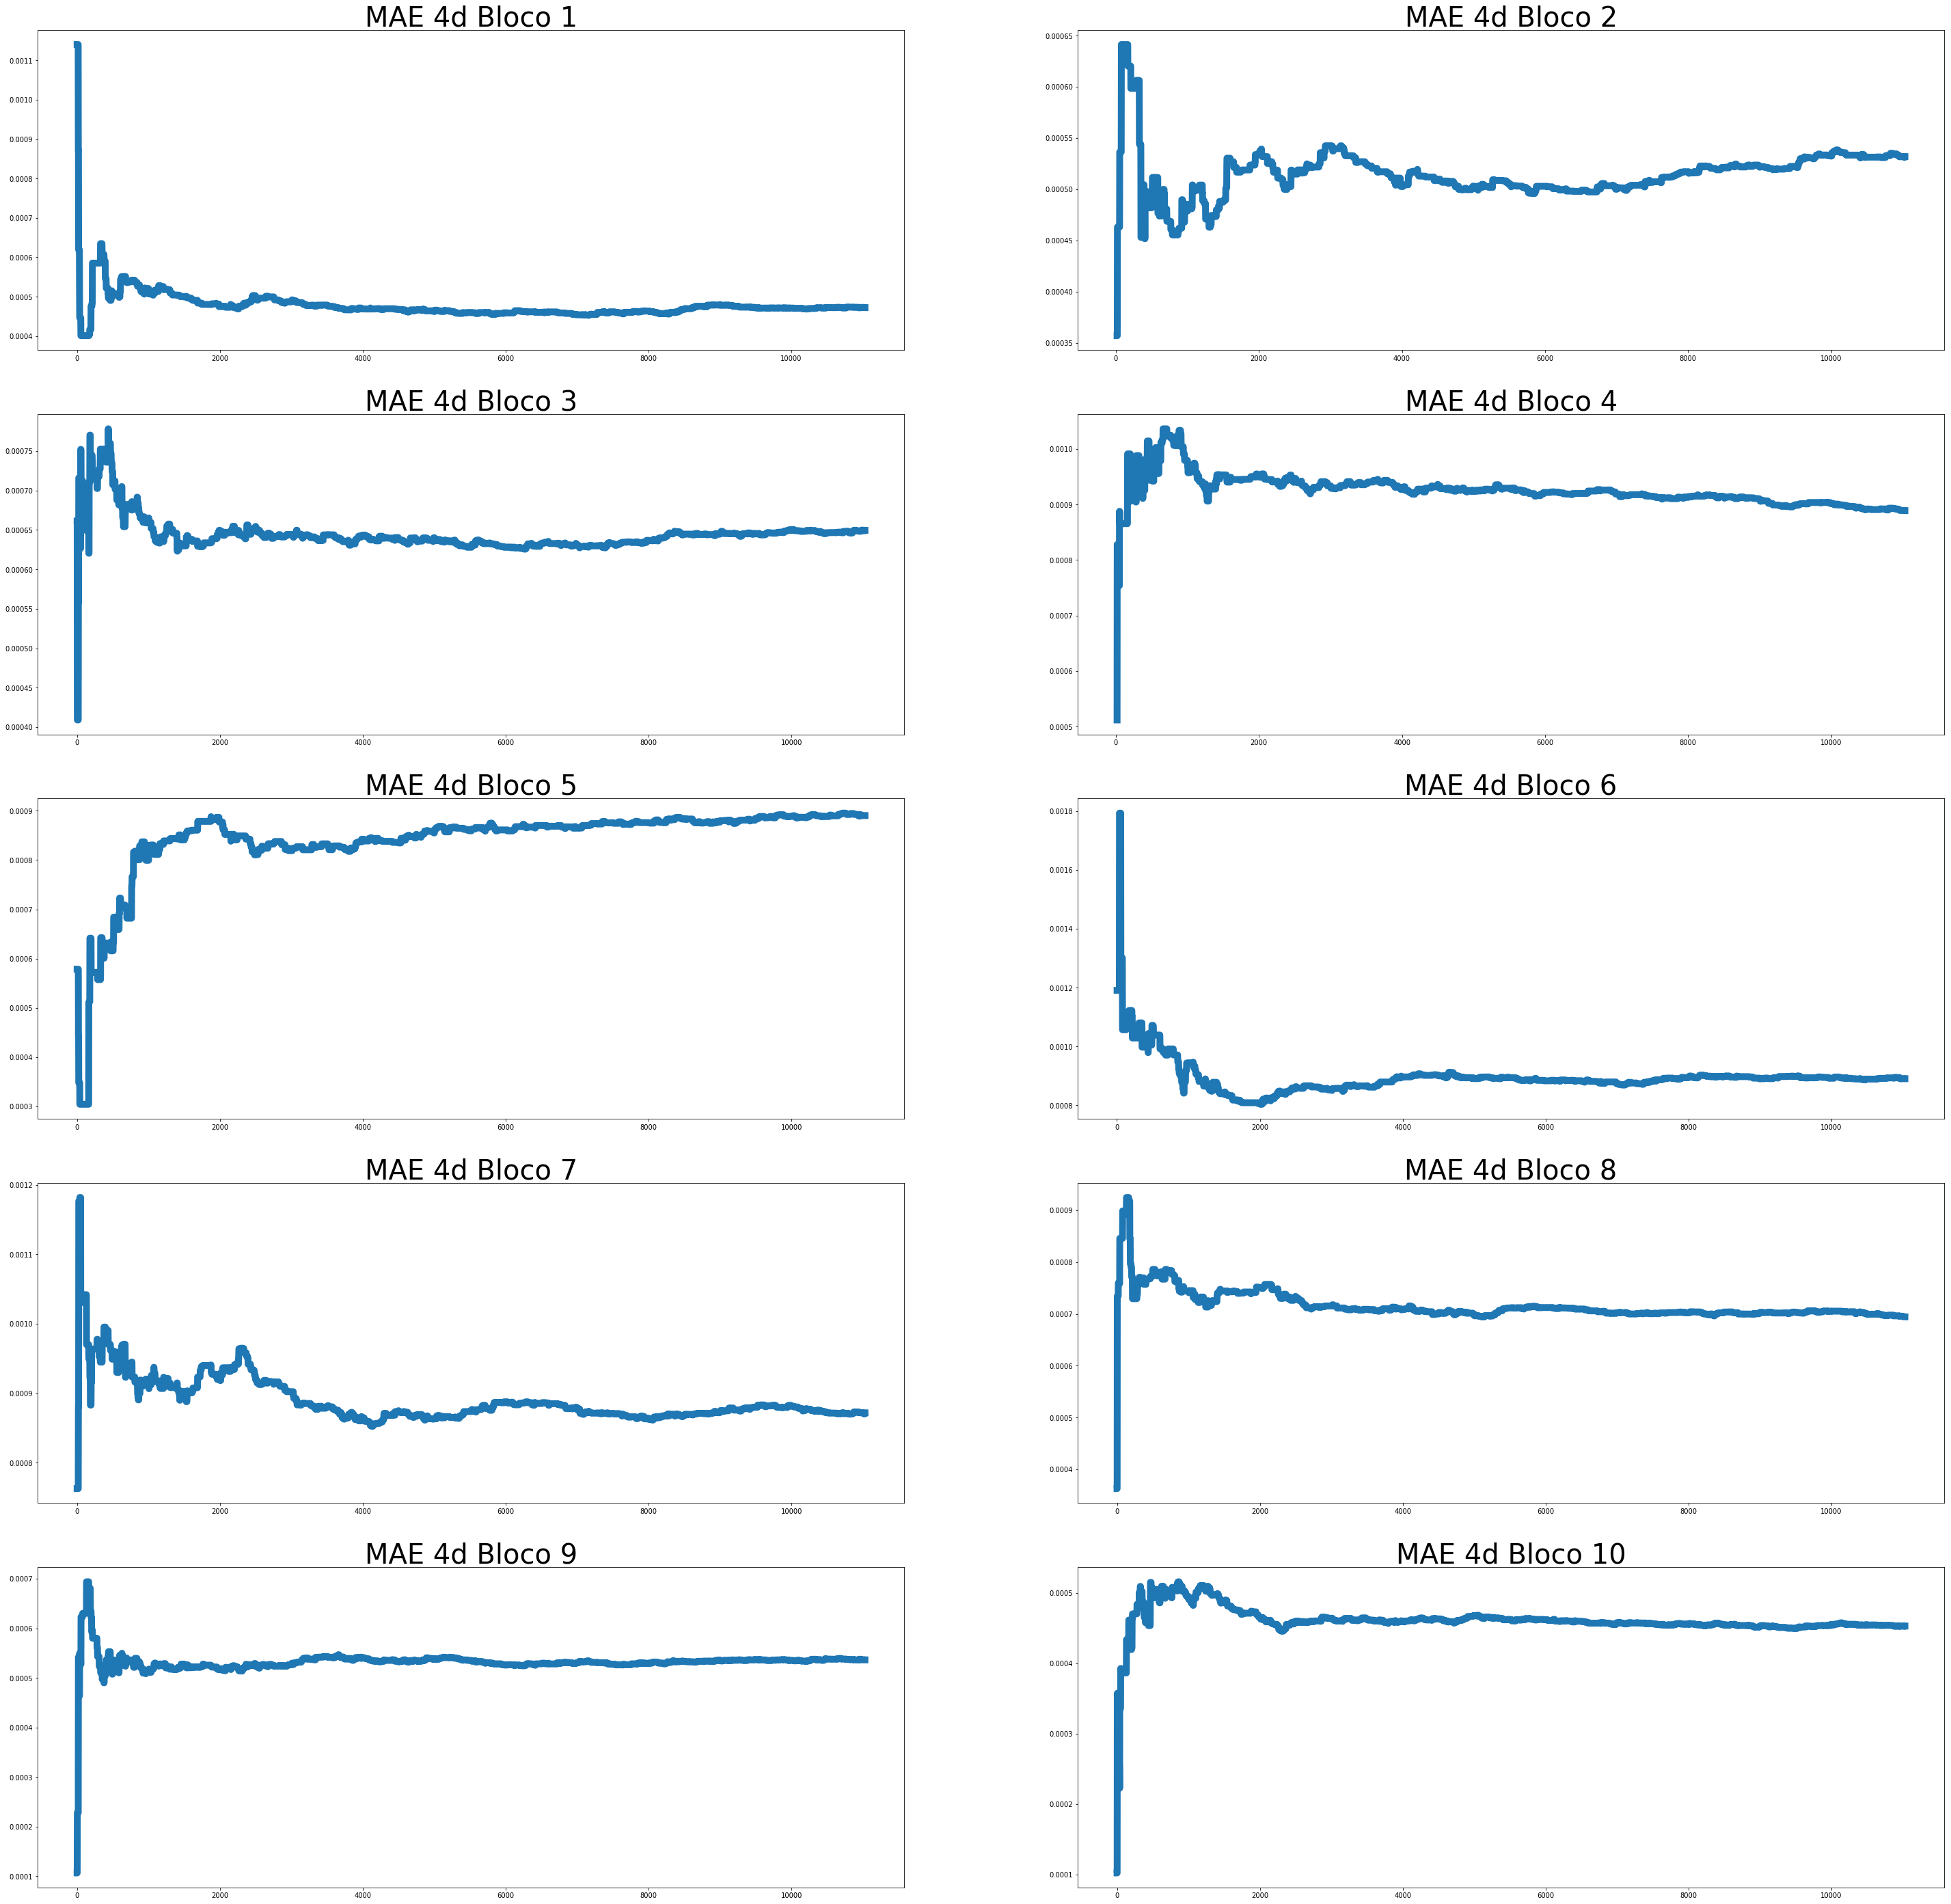

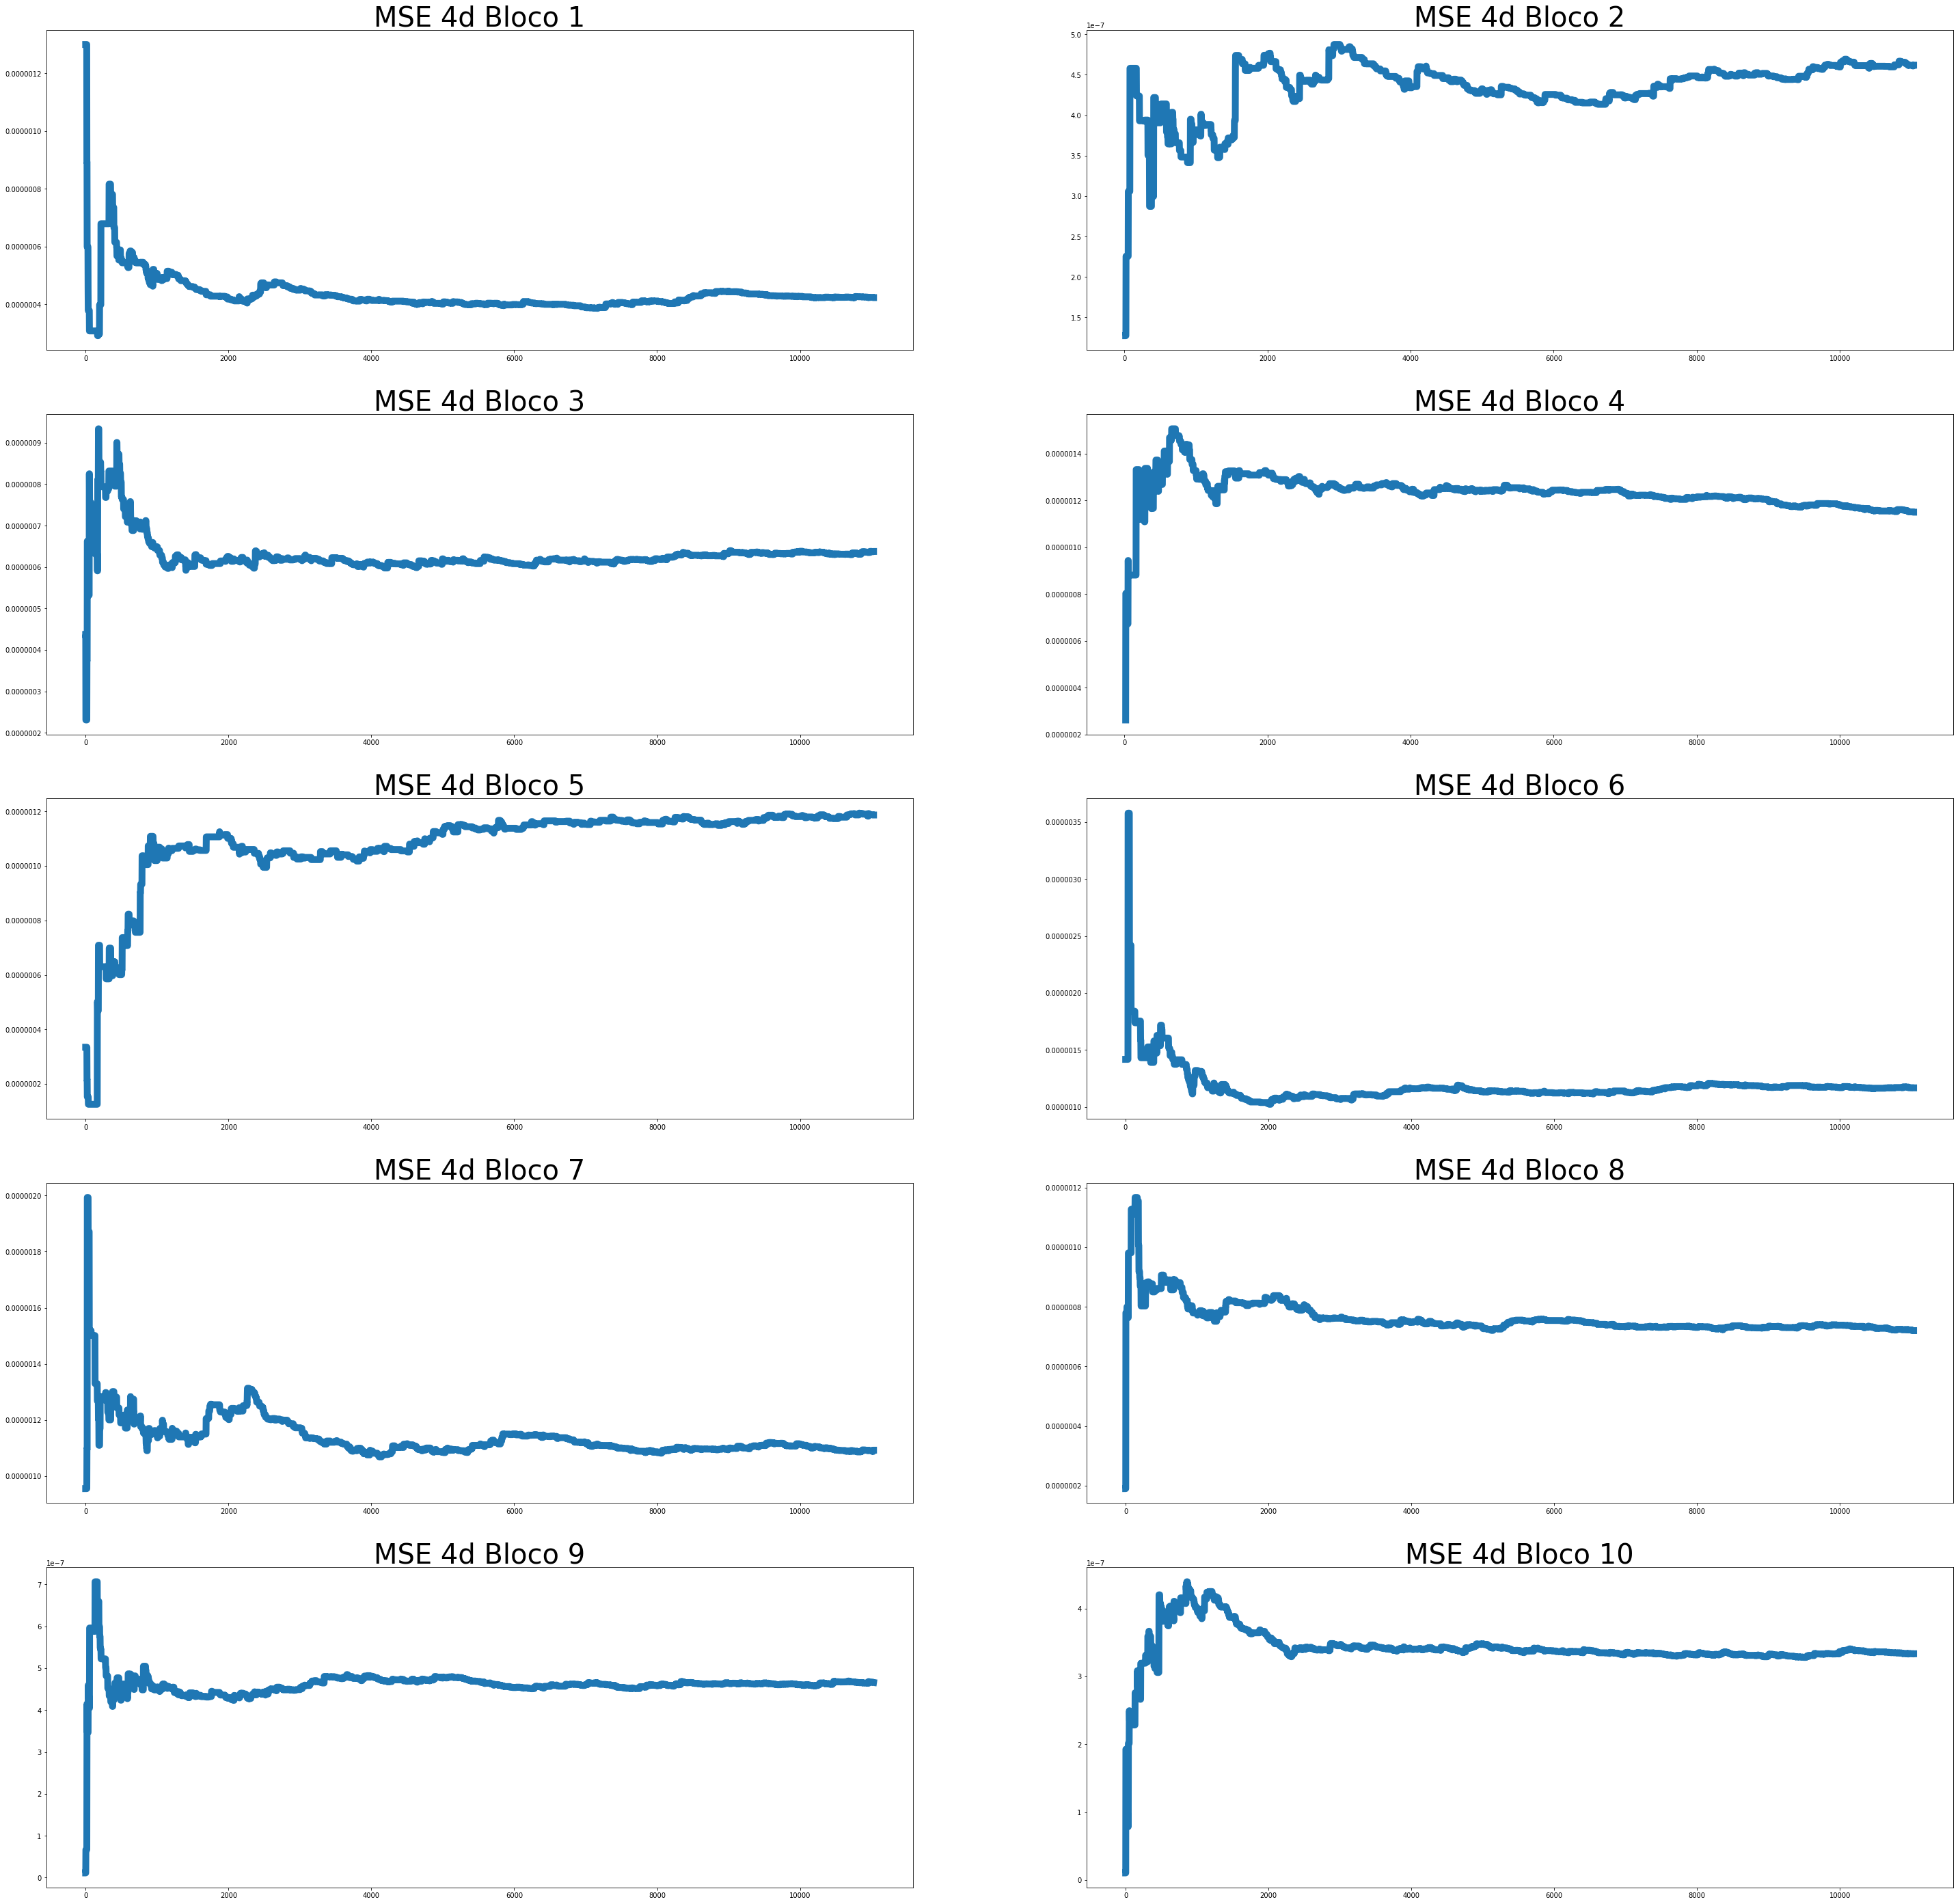

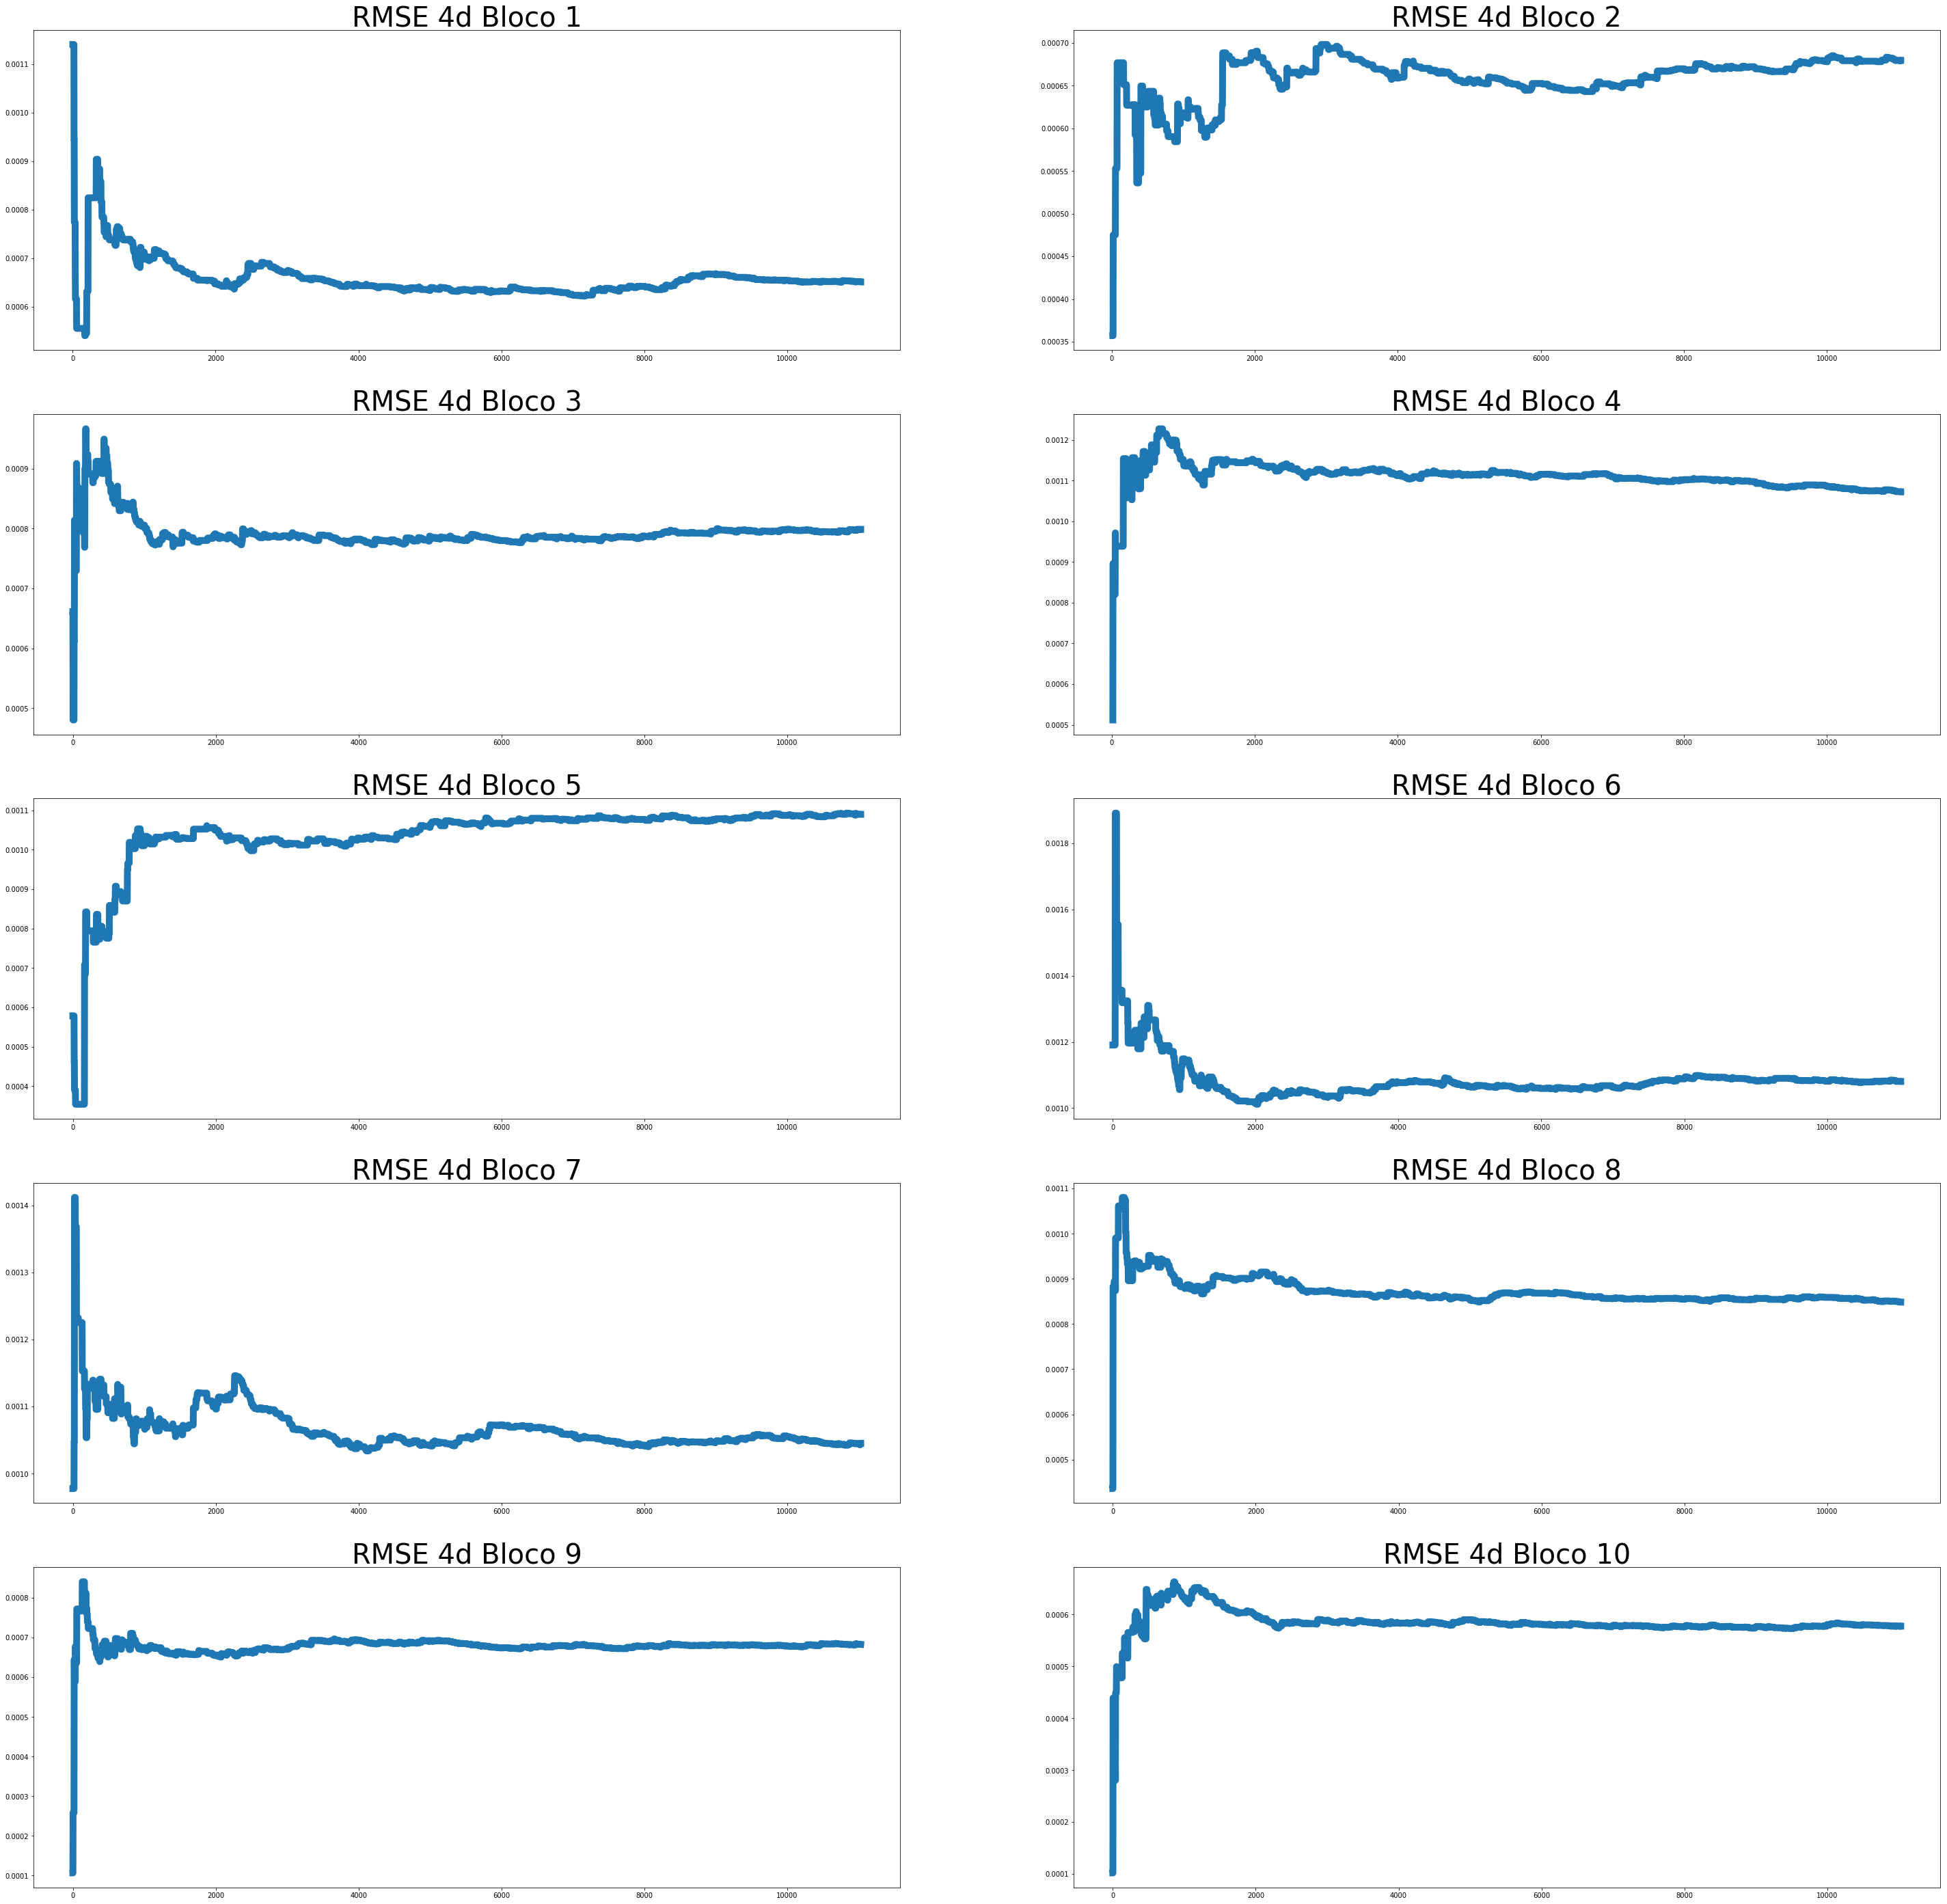

In [5]:
t=np.arange(len(MAE))


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE2Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE3Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE4Dc[:,i],linewidth=10)
plt.show()

ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS 



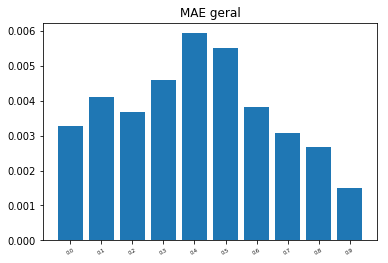

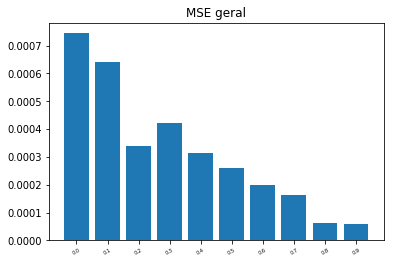

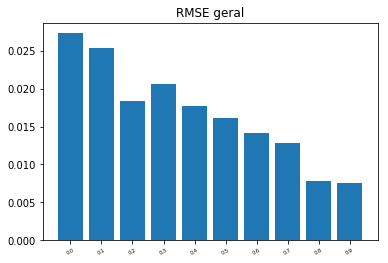


 
 ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL 



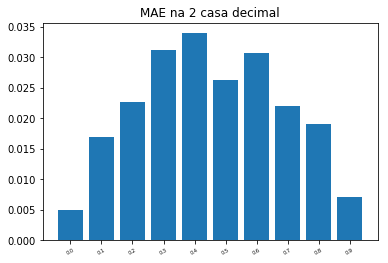

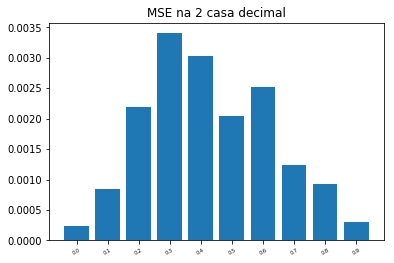

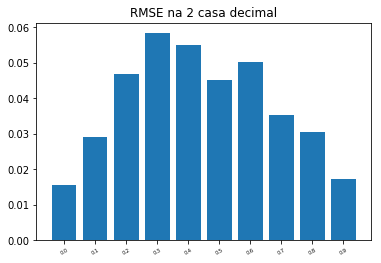


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL 



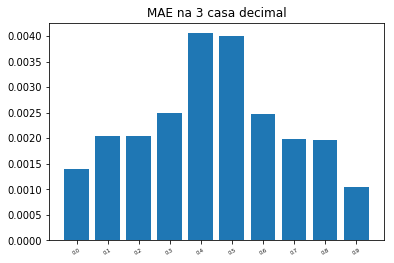

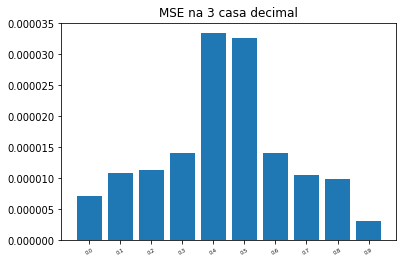

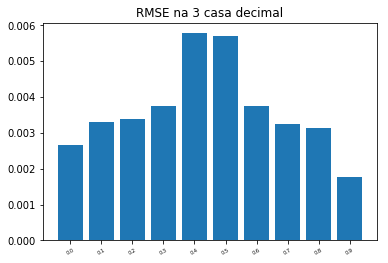


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL 



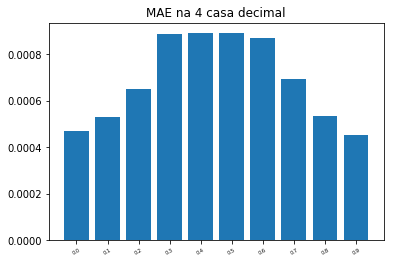

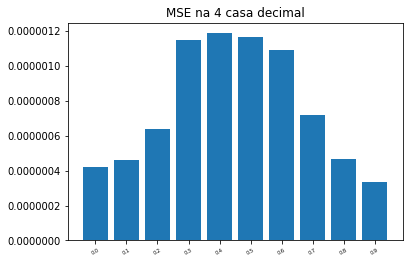

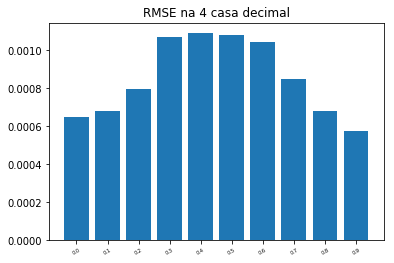

In [6]:
#------ ERROS GERAIS, DE CADA BLOCO

print('ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS \n')



label = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


index = np.arange(len(MAE[-1]))
plt.bar(index, MAE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE geral')
plt.show()

index = np.arange(len(MSE[-1]))
plt.bar(index, MSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE geral')
plt.show()



index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE geral')
plt.show()

#------ ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL
print('\n \n ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL \n')


index = np.arange(len(MAE2D[-1]))
plt.bar(index, MAE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 2 casa decimal')
plt.show()

index = np.arange(len(MSE2D[-1]))
plt.bar(index, MSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 2 casa decimal')
plt.show()


index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 2 casa decimal')
plt.show()
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL \n')

index = np.arange(len(MAE3D[-1]))
plt.bar(index, MAE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 3 casa decimal')
plt.show()



index = np.arange(len(MSE3D[-1]))
plt.bar(index, MSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 3 casa decimal')
plt.show()



index = np.arange(len(RMSE3D[-1]))
plt.bar(index, RMSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 3 casa decimal')
plt.show()
  
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL \n')



index = np.arange(len(MAE4D[-1]))
plt.bar(index, MAE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 4 casa decimal')
plt.show()


index = np.arange(len(MSE4D[-1]))
plt.bar(index, MSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 4 casa decimal')
plt.show()


index = np.arange(len(RMSE4D[-1]))
plt.bar(index, RMSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 4 casa decimal')
plt.show()


In [1]:
mae34d,mse3d,rmse3d = get_errors(np.vstack(get_array(erro3d_bl0),get_array(erro4d_bl0)),np.vstack(get_array(erro3d_bl1),get_array(erro4d_bl1)),np.vstack(get_array(erro3d_bl2),get_array(erro4d_bl2)),np.vstack(get_array(erro3d_bl3),get_array(erro4d_bl3)),np.vstack(get_array(erro3d_bl4),get_array(erro4d_bl4)),np.vstack(get_array(erro3d_bl5),get_array(erro4d_bl5)),np.vstack(get_array(erro3d_bl6),get_array(erro4d_bl6)),np.vstack(get_array(erro3d_bl7),get_array(erro4d_bl7)),np.vstack(get_array(erro3d_bl8),get_array(erro4d_bl8)),np.vstack(get_array(erro3d_bl9),get_array(erro4d_bl9)))  
print(mae34d)

NameError: name 'get_errors' is not defined